# Project: Nanowire Protein Prediction using machine learning & text mining

  ## Author: Raya
 Affiliation: 2DBEST, DDMD, Biointerface DU, BicBioENG Lab, Dhiman Lab

What is Nanowire Protein
- Nanowire Protein would have nanowire domain ()
- Protein to be involved in directly in Nanowire formation mechanism.
- NW protein


## Project Overview and Goal

# 1. Data mining






In [ ]:
!pip install bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from Bio import SeqIO
from google.colab import files
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from os import listdir
import json
import csv
import os
from sklearn.metrics import roc_curve, auc

## 1.1. Data Sources Identification


### Fasta to Txt file

In [ ]:
#Function to retrieve model performance metrics in csv file
def get_metrics(file_name, classifier_metrics, accuracy, roc, sub_group, initialize):
  tuple1 = ('sub group','Accuracy','precision','recall','f1score','roc_auc')
  with open(file_name, 'a', newline = '') as f :
    writer = csv.writer(f)
    if(initialize == True):
      writer.writerow(tuple1)
    weighted_avg = classifier_metrics.get('weighted avg')
    precision = weighted_avg['precision']
    recall = weighted_avg['recall']
    f1_score = weighted_avg['f1-score']
    tuple2 = (sub_group,accuracy,precision,recall,f1_score,roc)
    writer.writerow(tuple2)

#### Curated NCBI and Uniprot Protein Extraction

In [ ]:
for re in SeqIO.parse('NCBI_doconno.fasta', 'fasta'):
    print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))

original_NCBI = sys.stdout
with open('NCBI.txt', 'w') as f:
    sys.stdout = f
    for re in SeqIO.parse('NCBI_doconno.fasta', 'fasta'):
      print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))
    sys.stdout = original_NCBI

#files.download('NCBI.txt')

>GFE58177.1 cytochrome c [Geobacter sp. AOG1]	MRRLFILLVLLCALPVFLYAKEYKVVTFKTETAGTVEFNHDVHLARLGKSCTACHNTLYNVVKKNPSVTMAEMEKGKSCGACHDKKKAFALADCIRCHRVKDVPIEIPDFGAVVFSHNFHLGMYSCGECHNKLFKPGPGNPHVSMAQMERGASCGTCHDGKSAFTVKENCTKCHAVKDIPFSADAQFSHKVHLAMYGCGDCHSKLFVAGPNSKRYTMQEMANGRSCGACHDGKTGFSVQGDCGKCHQGVKEVSFKASDALFSHKFHLTIYRCADCHSGIFVGGAGSKRFTMADMEKSRSCGACHDSNIAFSVAGSCNKCHTSTKEITFDIKDAGKVTFSHDFHKGMYACGDCHNKVFRTGSESRHYSMAEMEKGQSCGACHDGKTAFTVAGNCGKCHPVKEITFTDDAVFSHTKHLEMYRCADCHNKLFKAGPDNTRHTMGEMEKGTSCGACHDGNTGFSVKGDCNRCHKTTIEVTFKVPETGATLFSHKFHTGMYKCTDCHNSIFATGKAAKRYKMVDMEQGRSCGACHDAKTAFSVKENCEKCHPVKEVRFKESGALFSHKFHIAAYRCNDCHDKIFSPGLATRRATMPDMEKGKSCGACHDGKSAFVSSENCAKCHTVTKAVRYEIPGTVGNALFSHKVHMSRGYTCADCHKKLIPTGVERRPVTMKQMEEGKSCGSCHGFSMAFSVKDQSSCDRCHQRRFVPEN
>WP_170241857.1 cytochrome c3 family protein [Geobacter argillaceus]	MNRLWVPAVLILLLGVPFFLHAKDYKVVTFKTVNAGKVNFPHDPHLKKLGNNCTQCHNALYTIGRQNPPVTMAEMEKGKSCGACHNTVKAFGLPECTRCHITREVPIQIPDFGTITFSHAFHLTRFQCWDCHNGLFIAGPGNPHVSMADMEGGLSCGGCHDGRIAFSVKGDCVKCH

In [ ]:
with open('NCBI.txt','r') as file1:
    NCBI_read=file1.read()

NCBI_data=[]
for each in NCBI_read.split('\n'):
    NCBI_data.append(each[1:].split('\t'))

NCBI_df=pd.DataFrame(NCBI_data)
NCBI_df = NCBI_df.drop_duplicates()
NCBI_df.columns=['Bac','sequence', 'None', 'None1']
NCBI_df = NCBI_df.drop('None', axis=1)
NCBI_df = NCBI_df.drop('None1', axis=1)
NCBI_df.head()
NCBI_df.to_csv('NCBI.csv')
#files.download('NCBI.csv')

#### Uniprot Extraction

In [ ]:
for re in SeqIO.parse('Uniprot_doconno.fasta', 'fasta'):
    print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))

original_uniprot = sys.stdout
with open('uniprot.txt', 'w') as f:
    sys.stdout = f
    for re in SeqIO.parse('Uniprot_doconno.fasta', 'fasta'):
      print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))
    sys.stdout = original_uniprot

#files.download('uniprot.txt')

>sp	Q749L1	CYCC_GEOSL C-type polyheme cytochrome OmcC OS=Geobacter sulfurreducens (strain ATCC 51573 / DSM 12127 / PCA) OX=243231 GN=omcC PE=1 SV=1	MSRKVTKYSAVLAVSLFAAALAGCGSENKEGTVGTGPGGVATVGDTACVQCHSAVVDPLTGESIITQYTRSFHYSKGVGCEGCHGGGAQHNGVGPLPFPLAGQSEAQIAARCASCHNGVIAPLSSSPNFVNGNHANPFGGEEAKENLCSRCHSHEGAIFGAQAGFTGDGNILRNAAYQPVYPQDPETFNVMTCATCHQHGGAQRQVFTQISTAGVPNSRRTVAWDPNRNSINDQYDLCTSCHTVNTMTGTLIGSGNVLQIFTSNAVGSGTKSVTTAPFYHNTRWFRTLPSTHYDFPESKTTASGTTIEGYVIRRNTANPCFDCHGHEFQTNTRRLAGADRPNTIFLDWGQSAHGGKLLQAKVAAAALASSGAAEVDDVMKAGATDATAPGWTHYNWDDTASRGACQRCHTSTGASNFLNNPAGYDRTGAGNSFTHLAGWTSSNKRSDQNELLYCWGCHTKAGTGELRNPGAITEVYPGINSTSTGTTGLDVTVSYPDIKGSNVCMGCHLGREVGDNIKAITDADGILGFVNSHYLTAGGQLFGTTGYEYATRSYANPAFFQHDKIGTAAAPGTGTNGPCAGCHMTTPTSHLFLPVTKDGTGAITAITSTACVTCHAGTFALTPEGLTAEEEEYVASLEALKAALAGKGILFFNAHPYFYRDTNANGIADPGETVSSNAFTNWAGVYGLALWQDVMGAAFNANLLIHDPGGYAHNRFYSKRLIWDSIDFIFDGVLNNDVTAAIDAQVTAARLDSATATAAKAYLGATRP
>sp	Q74A86	OMCS_GEOSL C-type cytochrome OmcS OS=Geobacter sulfurreducens (strain AT

In [ ]:
with open('uniprot.txt','r') as file2:
    uniprot_read=file2.read()

uniprot_data=[]

for each in uniprot_read.split('\n'):
    uniprot_data.append(each[1:].split('\t'))

uniprot_df=pd.DataFrame(uniprot_data)
uniprot_df = uniprot_df.drop_duplicates()
uniprot_df.columns=['0','1','Bac', 'sequence']
uniprot_df = uniprot_df.drop('0', axis=1)
uniprot_df = uniprot_df.drop('1', axis=1)
uniprot_df.head()
uniprot_df.to_csv("uniprot.csv")

#files.download('uniprot.csv')


In [ ]:
len(uniprot_df)

842

##### Merging two files

In [ ]:
csv_in = ["uniprot.csv", "NCBI.csv"]
csv_out = "mergedPos.csv"

skip_header = False
with open(csv_out, "w") as dest:
    for csv in csv_in:
        with open(csv, "r") as src:
            if skip_header:
                next(src)
            for line in src:
                dest.write(line)
                if line[-1] != "\n":
                    dest.write("\n")
            skip_header = True
#files.download('mergedPos.csv')

In [ ]:
for re in SeqIO.parse('Merged.fasta', 'fasta'):
    print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))

original_Merged= sys.stdout
with open('Merged.txt', 'w') as f:
    sys.stdout = f
    for re in SeqIO.parse('Merged.fasta', 'fasta'):
      print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))
    sys.stdout = original_Merged

>sp	Q749L1	CYCC_GEOSL C-type polyheme cytochrome OmcC OS=Geobacter sulfurreducens (strain ATCC 51573 / DSM 12127 / PCA) OX=243231 GN=omcC PE=1 SV=1	MSRKVTKYSAVLAVSLFAAALAGCGSENKEGTVGTGPGGVATVGDTACVQCHSAVVDPLTGESIITQYTRSFHYSKGVGCEGCHGGGAQHNGVGPLPFPLAGQSEAQIAARCASCHNGVIAPLSSSPNFVNGNHANPFGGEEAKENLCSRCHSHEGAIFGAQAGFTGDGNILRNAAYQPVYPQDPETFNVMTCATCHQHGGAQRQVFTQISTAGVPNSRRTVAWDPNRNSINDQYDLCTSCHTVNTMTGTLIGSGNVLQIFTSNAVGSGTKSVTTAPFYHNTRWFRTLPSTHYDFPESKTTASGTTIEGYVIRRNTANPCFDCHGHEFQTNTRRLAGADRPNTIFLDWGQSAHGGKLLQAKVAAAALASSGAAEVDDVMKAGATDATAPGWTHYNWDDTASRGACQRCHTSTGASNFLNNPAGYDRTGAGNSFTHLAGWTSSNKRSDQNELLYCWGCHTKAGTGELRNPGAITEVYPGINSTSTGTTGLDVTVSYPDIKGSNVCMGCHLGREVGDNIKAITDADGILGFVNSHYLTAGGQLFGTTGYEYATRSYANPAFFQHDKIGTAAAPGTGTNGPCAGCHMTTPTSHLFLPVTKDGTGAITAITSTACVTCHAGTFALTPEGLTAEEEEYVASLEALKAALAGKGILFFNAHPYFYRDTNANGIADPGETVSSNAFTNWAGVYGLALWQDVMGAAFNANLLIHDPGGYAHNRFYSKRLIWDSIDFIFDGVLNNDVTAAIDAQVTAARLDSATATAAKAYLGATRP
>sp	Q74A86	OMCS_GEOSL C-type cytochrome OmcS OS=Geobacter sulfurreducens (strain AT

#### Negative dataset



In [ ]:
for re in SeqIO.parse('Negative.fasta', 'fasta'):
    print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))

original_Negative = sys.stdout
with open('Negative.txt', 'w') as f:
    sys.stdout = f
    for re in SeqIO.parse('Negative.fasta', 'fasta'):
      print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))
    sys.stdout = original_Negative

#files.download('Negative.txt')

>WP_203228290.1 lactate dehydrogenase [Staphylococcus aureus]	MKLGLIGIGKVGSQILNDIQYLNLFSDIVIIDENTELVRGEILDYRHAQGLKNTSNINIKSGSYSDLKDVDVIVITASAPMSIDMPDRTALTKDNISIVKDIMENIIKFQKEALIIFVTNPVDAMNYIAVQTSDYPKEKIIGTGTLLESARFKTLIADHYDIDPKSVEAFVIGEHGKHAVPIWSKVRISGMNIEEFEKLSGKVKIDTESISNQIDKVSFDVLKGKGWTNVAISKTTVELIKSLVLDERSILPVSSINTKNTHSISLPTLLSRRGVEKVFNIDISDIERKQFENAEKFIENTIAIQNSI
>WP_142359567.1 lactate dehydrogenase, partial [Staphylococcus aureus]	MTKIMFFGTRDYEKEMALNWGKKNNVEVTTSKELLSSATVDQLKDYDGVTTMQFGKLENDVYPKLESYGIKQIAQRTAGFDMYDLDLAKKHNIVISNVPSYSPETIAEYSVSIALQLVRRFPDIERRVQAHDFTWQAEIMSKPVKNMTVAIIGTGRIGAATAKIYAGFGATITAYDAYPNKDLDFLTYKDSVKEAIKDADIISLHVPANKESYHLFDKAMFNHVKK
>WP_069724636.1 lactate dehydrogenase, partial [Staphylococcus aureus]	MTKIMFFGTRDYEKEMALNWGKKNNVEVTTSKELLSSATVDQLKDYDGVTTMQFGKLENDVYPKLESYGIKQIAQRTAGFDMYDLDLAKKHNIVISNVPSYSPETIAEYSVSIALQLVRRFPDIERRVQAHDFTWQAEIMSKPVKNMTVAIIGTGRIGAATAKIYAGFGATITAYDAYPNKDLDFLTYKDSVKEAIKDADIISLHVPANKESYHLFDKAMFDHVK
>WP_031873130.1 lactate dehydrogen

In [ ]:
with open('Negative.txt','r') as file4:
    Negative_read=file4.read()

Negative_data=[]
for each in Negative_read.split('\n'):
    Negative_data.append(each[1:].split('\t'))

Negative_df=pd.DataFrame(Negative_data)
Negative_df = Negative_df.drop_duplicates()
Negative_df.columns=['Bac','sequence']

Negative_df.head()
Negative_df.to_csv('Negative.csv')
#files.download('Negative.csv')

In [ ]:
csv_in = ["mergedPos.csv", "Negative.csv"]
csv_out = "merged.csv"

skip_header = False
with open(csv_out, "w") as dest:
    for csv in csv_in:
        with open(csv, "r") as src:
            if skip_header:
                next(src)
            for line in src:
                dest.write(line)
                if line[-1] != "\n":
                    dest.write("\n")
            skip_header = True
#files.download('merged.csv')

#### Independent dataset

In [ ]:
for re in SeqIO.parse('Independent.fasta', 'fasta'):
    print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))

original_Independent = sys.stdout
with open('Independent.txt', 'w') as f:
    sys.stdout = f
    for re in SeqIO.parse('Independent.fasta', 'fasta'):
      print('>{}\t{}'.format(str(re.description).replace('|', '\t'), re.seq))
    sys.stdout = original_Independent

files.download('Independent.txt')

>WP_011368230.1 Flp family type IVb pilin [Desulfovibrio alaskensis]	MKKTIMNLLKGEEGATALEYGLIAALIAAVIVAAVTALGTKVSDTFTYIDSKMPTPGT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#2. Dataset Preparation for Machine Learning design

### Feature extraction using iFeature


In [ ]:
# Only for running on Google Colab
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [ ]:
!pip3 install iFeatureOmegaCLI
!pip install rdkit

In [ ]:
import iFeatureOmegaCLI

In [ ]:
protein = iFeatureOmegaCLI.iProtein('Merged.fasta')
protein.display_feature_types()


        ----- Available feature types ------        
        
        AAC                                                Amino acid composition
        EAAC                                               Enhanced amino acid composition
        CKSAAP type 1                                      Composition of k-spaced amino acid pairs type 1 - normalized
        CKSAAP type 2                                      Composition of k-spaced amino acid pairs type 2 - raw count
        DPC type 1                                         Dipeptide composition type 1 - normalized
        DPC type 2                                         Dipeptide composition type 2 - raw count
        TPC type 1                                         Tripeptide composition type 1 - normalized
        TPC type 2                                         Tripeptide composition type 1 - raw count
        CTDC                                               Composition
        CTDT                                      

## 2.1. Labeling: Positive/Negative Dataset on Nanowire protein
### Definition:

#### Positive dataset

In [ ]:
with open('uniprot.txt','r') as file6:
    pos_read=file6.read()

pos_data=[]

for each in pos_read.split('\n'):
    pos_data.append(each[1:].split('\t'))

pos_df=pd.DataFrame(pos_data) #changing uniprot_data to pos_data
pos_df = pos_df.drop_duplicates()
pos_df.columns=['0','1','Bac', 'sequence']
pos_df = pos_df.drop('0', axis=1)
pos_df = pos_df.drop('1', axis=1)
pos_df.head()
pos_df.to_csv('pos.csv')
#files.download('pos.csv')

#### Negative dataset

In [ ]:
with open('Negative.txt','r') as file7:
    Negative_read=file7.read()

Negative_data=[]
for each in Negative_read.split('\n'):
    Negative_data.append(each[1:].split('\t'))


Neg_df=pd.DataFrame(Negative_data)
Neg_df=pd.DataFrame(Negative_data)
Neg_df = Neg_df.drop_duplicates() #change from Negative_df to Neg_df
Neg_df.columns=['Bac','sequence']
Neg_df.head()
Neg_df.to_csv('Neg.csv')
#files.download('Neg.csv')

#### Independent dataset


In [ ]:
with open('Independent.txt','r') as file8:
    Inde_read=file8.read()

Inde_data=[]
for each in Inde_read.split('\n'):
    Inde_data.append(each[1:].split('\t'))
Inde_df=pd.DataFrame(Inde_data)
Inde_df=pd.DataFrame(Inde_data)
Inde_df = Inde_df.drop_duplicates()
Inde_df.columns=['Bac','sequence']
Inde_df.head()

,Bac,sequence
0,WP_011368230.1 Flp family type IVb pilin [Desu...,MKKTIMNLLKGEEGATALEYGLIAALIAAVIVAAVTALGTKVSDTF...
1,,None


## 2.2. Features extraction

In [ ]:
#Generating Sequence Descriptor Features with iFeature
protein_descriptors = ["CTDC","TPC type 1","CTDD","CTDT","AAC","KNN",
                       "CKSAAP type 1","DPC type 1","DPC type 2","ZScale",
                       "AAIndex","PAAC","SOCNumber","Geary","TPC type 2","Moran",
                       "AC","CTriad","NMBroto","CC","GAAC","QSOrder"]
for i in range (len(protein_descriptors)):
  protein.get_descriptor(protein_descriptors[i])
  if(protein_descriptors[i] == "CKSAAP type 1"):
    protein.to_csv("CKSAAP.csv",index=True, header=True)
  elif (protein_descriptors[i] == "DPC type 1"):
    protein.to_csv("DPC1.csv",index=True, header=True)
  elif (protein_descriptors[i] == "DPC type 2"):
    protein.to_csv("DPC2.csv",index=True, header=True)
  elif (protein_descriptors[i] == "TPC type 1"):
    protein.to_csv("TPC1.csv",index=True, header=True)
  elif (protein_descriptors[i] == "TPC type 2"):
    protein.to_csv("TPC2.csv",index=True, header=True)
  elif (protein_descriptors[i] == "TPC type 2"):
    protein.to_csv("TPC2.csv",index=True, header=True)
  else:
    protein.to_csv(protein_descriptors[i]+".csv",index=True, header=True)

#### #QSOrder

In [ ]:
QSOrder_df=pd.read_csv('QSOrder.csv')
QSOrder_df = QSOrder_df.drop('Unnamed: 0',axis=1)

key_df_QSO = pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_QSO = pd.concat([key_df_QSO, QSOrder_df], axis=1)
fea_df_QSO = fea_df_QSO.set_index('sequence')
fea_df_QSO['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_QSO = pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_QSO = pos_sequence_QSO.index
for i in range (fea_df_QSO.shape[0]):
  if(fea_df_QSO.index[i] in data_pos_sequence_index_QSO):
    fea_df_QSO.at[fea_df_QSO.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_QSO = pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_QSO = neg_sequence_QSO.index
for i in range (fea_df_QSO.shape[0]):
  if(fea_df_QSO.index[i] in data_neg_sequence_index_QSO):
    fea_df_QSO.at[fea_df_QSO.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_QSO.drop(fea_df_QSO[fea_df_QSO.Class == -1].index, inplace=True)
fea_df_QSO = fea_df_QSO.dropna()
fea_df_QSO = fea_df_QSO.reset_index(drop=True)

#Separation of features and target
X_QSO = fea_df_QSO.drop('Class', axis=1)
Y_QSO = fea_df_QSO['Class']
Y_QSO = Y_QSO.values.flatten()

trainX_QSO, testX_QSO, trainY_QSO, testY_QSO = train_test_split(X_QSO, Y_QSO, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_QSO = sc.fit_transform(trainX_QSO)
testX_QSO = sc.transform(testX_QSO)

#K-Fold validation
classifier_QSO = RandomForestClassifier(n_estimators=20, random_state=42)
RF_scores = cross_val_score(classifier_QSO, trainX_QSO, trainY_QSO, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.98 accuracy with a standard deviation of 0.00
[0.98545455 0.97818182 0.98540146 0.98540146 0.98905109]


In [ ]:
classifier_QSO.fit(trainX_QSO, trainY_QSO)
y_pred_class_QSO = classifier_QSO.predict(testX_QSO)

cf_matrix_QSO = confusion_matrix(testY_QSO,y_pred_class_QSO)
metrics_QSO = classification_report(testY_QSO,y_pred_class_QSO)
metrics_QSO1 = classification_report(testY_QSO,y_pred_class_QSO, output_dict=True)
accuracy_QSO = accuracy_score(testY_QSO, y_pred_class_QSO)
print("accuracy:", accuracy_QSO)
print(confusion_matrix(testY_QSO,y_pred_class_QSO))
print(metrics_QSO)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_QSO, y_pred_class_QSO)
auc_keras_QSO = auc(nn_fpr_keras, nn_tpr_keras)

get_metrics('sub_group_model_metrics.csv',metrics_QSO1,accuracy_QSO,auc_keras_QSO,'QSO',True)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_QSO))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9914965986394558
[[320   3]
 [  2 263]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       323
           1       0.99      0.99      0.99       265

    accuracy                           0.99       588
   macro avg       0.99      0.99      0.99       588
weighted avg       0.99      0.99      0.99       588



AttributeError: 'str' object has no attribute 'writer'

#### #GAAC

In [ ]:
GAAC_df=pd.read_csv('GAAC.csv')
GAAC_df = GAAC_df.drop('Unnamed: 0',axis=1)

key_df_GAAC = pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_GAAC = pd.concat([key_df_GAAC, GAAC_df], axis=1)
fea_df_GAAC = fea_df_GAAC.set_index('sequence')
fea_df_GAAC['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_GAAC = pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_GAAC = pos_sequence_GAAC.index
for i in range (fea_df_GAAC.shape[0]):
  if(fea_df_GAAC.index[i] in data_pos_sequence_index_GAAC):
    fea_df_GAAC.at[fea_df_GAAC.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_GAAC = pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_GAAC = neg_sequence_GAAC.index
for i in range (fea_df_GAAC.shape[0]):
  if(fea_df_GAAC.index[i] in data_neg_sequence_index_GAAC):
    fea_df_GAAC.at[fea_df_GAAC.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_GAAC.drop(fea_df_GAAC[fea_df_GAAC.Class == -1].index, inplace=True)
fea_df_GAAC = fea_df_GAAC.dropna()
fea_df_GAAC = fea_df_GAAC.reset_index(drop=True)

#Separation of features and target
X_GAAC = fea_df_GAAC.drop('Class', axis=1)
Y_GAAC = fea_df_GAAC['Class']
Y_GAAC = Y_GAAC.values.flatten()

trainX_GAAC, testX_GAAC, trainY_GAAC, testY_GAAC = train_test_split(X_GAAC, Y_GAAC, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_GAAC = sc.fit_transform(trainX_GAAC)
testX_GAAC = sc.transform(testX_GAAC)

#K-Fold validation
classifier_GAAC = RandomForestClassifier(n_estimators=20, random_state=42)
RF_scores = cross_val_score(classifier_GAAC, trainX_GAAC, trainY_GAAC, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.92 accuracy with a standard deviation of 0.01
[0.90181818 0.91636364 0.94525547 0.92335766 0.90875912]


In [ ]:
classifier_GAAC.fit(trainX_GAAC, trainY_GAAC)
y_pred_class_GAAC = classifier_GAAC.predict(testX_GAAC)

cf_matrix_GAAC = confusion_matrix(testY_GAAC,y_pred_class_GAAC)
metrics_GAAC = classification_report(testY_GAAC,y_pred_class_GAAC)
metrics_GAAC1 = classification_report(testY_GAAC,y_pred_class_GAAC, output_dict=True)
accuracy_GAAC = accuracy_score(testY_GAAC, y_pred_class_GAAC)
print("accuracy:", accuracy_GAAC)
print(confusion_matrix(testY_GAAC,y_pred_class_GAAC))
print(metrics_GAAC)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_GAAC, y_pred_class_GAAC)
auc_keras_GAAC = auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_GAAC1,accuracy_GAAC,auc_keras_GAAC, 'GAAC',False)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_GAAC))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()


accuracy: 0.9540816326530612
[[311  12]
 [ 15 250]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       323
           1       0.95      0.94      0.95       265

    accuracy                           0.95       588
   macro avg       0.95      0.95      0.95       588
weighted avg       0.95      0.95      0.95       588



AttributeError: 'str' object has no attribute 'writer'

#### #CC

In [ ]:
CC_df=pd.read_csv('CC.csv')
CC_df = CC_df.drop('Unnamed: 0',axis=1)

key_df_CC = pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_CC = pd.concat([key_df_CC, CC_df], axis=1)
fea_df_CC = fea_df_CC.set_index('sequence')
fea_df_CC['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_CC = pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_CC = pos_sequence_CC.index
for i in range (fea_df_CC.shape[0]):
  if(fea_df_CC.index[i] in data_pos_sequence_index_CC):
    fea_df_CC.at[fea_df_CC.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_CC = pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_CC = neg_sequence_CC.index
for i in range (fea_df_CC.shape[0]):
  if(fea_df_CC.index[i] in data_neg_sequence_index_CC):
    fea_df_CC.at[fea_df_CC.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_CC.drop(fea_df_CC[fea_df_CC.Class == -1].index, inplace=True)
fea_df_CC = fea_df_CC.dropna()
fea_df_CC = fea_df_CC.reset_index(drop=True)

#Separation of features and target
X_CC = fea_df_CC.drop('Class', axis=1)
Y_CC = fea_df_CC['Class']
Y_CC = Y_CC.values.flatten()

trainX_CC, testX_CC, trainY_CC, testY_CC = train_test_split(X_CC, Y_CC, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_CC = sc.fit_transform(trainX_CC)
testX_CC = sc.transform(testX_CC)

#K-Fold validation
classifier_CC = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_CC, trainX_CC, trainY_CC, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.98 accuracy with a standard deviation of 0.01
[0.97818182 0.97454545 0.98540146 0.98905109 0.96715328]


In [ ]:

classifier_CC.fit(trainX_CC, trainY_CC)
y_pred_class_CC = classifier_CC.predict(testX_CC)

cf_matrix_CC = confusion_matrix(testY_CC,y_pred_class_CC)
metrics_CC = classification_report(testY_CC,y_pred_class_CC)
metrics_CC1 = classification_report(testY_CC,y_pred_class_CC, output_dict=True)
accuracy_CC = accuracy_score(testY_CC, y_pred_class_CC)
print("accuracy:", accuracy_CC)
print(confusion_matrix(testY_CC,y_pred_class_CC))
print(metrics_CC)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_CC, y_pred_class_CC)
auc_keras_CC = auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_CC1,accuracy_CC,auc_keras_CC, 'CC', False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_CC))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9897959183673469
[[318   5]
 [  1 264]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       323
           1       0.98      1.00      0.99       265

    accuracy                           0.99       588
   macro avg       0.99      0.99      0.99       588
weighted avg       0.99      0.99      0.99       588



AttributeError: 'str' object has no attribute 'writer'

#### #Moreau

In [ ]:
NMBroto_df=pd.read_csv('NMBroto.csv')
NMBroto_df = NMBroto_df.drop('Unnamed: 0',axis=1)

key_df_Moreau = pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_Moreau = pd.concat([key_df_Moreau, NMBroto_df], axis=1)
fea_df_Moreau = fea_df_Moreau.set_index('sequence')
fea_df_Moreau['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_Moreau = pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_Moreau = pos_sequence_Moreau.index
for i in range (fea_df_Moreau.shape[0]):
  if(fea_df_Moreau.index[i] in data_pos_sequence_index_Moreau):
    fea_df_Moreau.at[fea_df_Moreau.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_Moreau = pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_Moreau = neg_sequence_Moreau.index
for i in range (fea_df_Moreau.shape[0]):
  if(fea_df_Moreau.index[i] in data_neg_sequence_index_Moreau):
    fea_df_Moreau.at[fea_df_Moreau.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_Moreau.drop(fea_df_Moreau[fea_df_Moreau.Class == -1].index, inplace=True)
fea_df_Moreau = fea_df_Moreau.dropna()
fea_df_Moreau = fea_df_Moreau.reset_index(drop=True)

#Separation of features and target
X_Moreau = fea_df_Moreau.drop('Class', axis=1)
Y_Moreau = fea_df_Moreau['Class']
Y_Moreau = Y_Moreau.values.flatten()

trainX_Moreau, testX_Moreau, trainY_Moreau, testY_Moreau = train_test_split(X_Moreau, Y_Moreau, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_Moreau = sc.fit_transform(trainX_Moreau)
testX_Moreau = sc.transform(testX_Moreau)

#K-Fold validation
classifier_Moreau = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_Moreau, trainX_Moreau, trainY_Moreau, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.96 accuracy with a standard deviation of 0.01
[0.95272727 0.96       0.96715328 0.96350365 0.94160584]


In [ ]:

classifier_Moreau.fit(trainX_Moreau, trainY_Moreau)
y_pred_class_Moreau = classifier_Moreau.predict(testX_Moreau)

cf_matrix_Moreau = confusion_matrix(testY_Moreau,y_pred_class_Moreau)
metrics_Moreau = classification_report(testY_Moreau,y_pred_class_Moreau)
metrics_Moreau1 = classification_report(testY_Moreau,y_pred_class_Moreau, output_dict=True)
accuracy_Moreau = accuracy_score(testY_Moreau, y_pred_class_Moreau)
print("accuracy:", accuracy_Moreau)
print(confusion_matrix(testY_Moreau,y_pred_class_Moreau))
print(metrics_Moreau)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_Moreau, y_pred_class_Moreau)
auc_keras_Moreau = auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_Moreau1,accuracy_Moreau,auc_keras_Moreau,'Moreau', False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_Moreau))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9642857142857143
[[307  16]
 [  5 260]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       323
           1       0.94      0.98      0.96       265

    accuracy                           0.96       588
   macro avg       0.96      0.97      0.96       588
weighted avg       0.97      0.96      0.96       588



AttributeError: 'str' object has no attribute 'writer'

#### AAC based features

In [ ]:
AAC_df=pd.read_csv('AAC.csv')
AAC_df = AAC_df.drop('Unnamed: 0',axis=1)


key_df_AAC = pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_AAC = pd.concat([key_df_AAC, AAC_df], axis=1)
fea_df_AAC = fea_df_AAC.set_index('sequence')
fea_df_AAC['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_AAC = pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_AAC = pos_sequence_AAC.index
for i in range (fea_df_AAC.shape[0]):
  if(fea_df_AAC.index[i] in data_pos_sequence_index_AAC):
    fea_df_AAC.at[fea_df_AAC.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_AAC = pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_AAC = neg_sequence_AAC.index
for i in range (fea_df_AAC.shape[0]):
  if(fea_df_AAC.index[i] in data_neg_sequence_index_AAC):
    fea_df_AAC.at[fea_df_AAC.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_AAC.drop(fea_df_AAC[fea_df_AAC.Class == -1].index, inplace=True)
fea_df_AAC = fea_df_AAC.dropna()
fea_df_AAC = fea_df_AAC.reset_index(drop=True)

#Separation of features and target
X_AAC = fea_df_AAC.drop('Class', axis=1)
Y_AAC = fea_df_AAC['Class']
Y_AAC = Y_AAC.values.flatten()

trainX_AAC, testX_AAC, trainY_AAC, testY_AAC = train_test_split(X_AAC, Y_AAC, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_AAC = sc.fit_transform(trainX_AAC)
testX_AAC = sc.transform(testX_AAC)

#K-Fold validation
classifier_AAC = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_AAC, trainX_AAC, trainY_AAC, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.99 accuracy with a standard deviation of 0.01
[0.98909091 0.97818182 0.99270073 0.98175182 0.98540146]


In [ ]:
classifier_AAC.fit(trainX_AAC, trainY_AAC)
y_pred_class_AAC = classifier_AAC.predict(testX_AAC)

cf_matrix_AAC = confusion_matrix(testY_AAC,y_pred_class_AAC)
metrics_AAC = classification_report(testY_AAC,y_pred_class_AAC)
metrics_AAC1 = classification_report(testY_AAC,y_pred_class_AAC, output_dict=True)
accuracy_AAC = accuracy_score(testY_AAC, y_pred_class_AAC)
print("accuracy:", accuracy_AAC)
print(confusion_matrix(testY_AAC,y_pred_class_AAC))
print(metrics_AAC)
print(accuracy_AAC)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_AAC, y_pred_class_AAC)
auc_keras_AAC = auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_AAC1,accuracy_AAC,auc_keras_AAC,'AAC', False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_AAC))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9880952380952381
[[318   5]
 [  2 263]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       323
           1       0.98      0.99      0.99       265

    accuracy                           0.99       588
   macro avg       0.99      0.99      0.99       588
weighted avg       0.99      0.99      0.99       588

0.9880952380952381


AttributeError: 'str' object has no attribute 'writer'

#### CKSAAP


In [ ]:
CKSAAP_df=pd.read_csv('CKSAAP.csv')
CKSAAP_df = CKSAAP_df.drop('Unnamed: 0',axis=1)


key_df_CKSAAP = pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_CKSAAP = pd.concat([key_df_CKSAAP, CKSAAP_df], axis=1)
fea_df_CKSAAP = fea_df_CKSAAP.set_index('sequence')
fea_df_CKSAAP['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_CKSAAP = pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_CKSAAP = pos_sequence_CKSAAP.index
for i in range (fea_df_CKSAAP.shape[0]):
  if(fea_df_CKSAAP.index[i] in data_pos_sequence_index_CKSAAP):
    fea_df_CKSAAP.at[fea_df_CKSAAP.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_CKSAAP = pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_CKSAAP = neg_sequence_CKSAAP.index
for i in range (fea_df_CKSAAP.shape[0]):
  if(fea_df_CKSAAP.index[i] in data_neg_sequence_index_CKSAAP):
    fea_df_CKSAAP.at[fea_df_CKSAAP.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_CKSAAP.drop(fea_df_CKSAAP[fea_df_CKSAAP.Class == -1].index, inplace=True)
fea_df_CKSAAP = fea_df_CKSAAP.dropna()
fea_df_CKSAAP = fea_df_CKSAAP.reset_index(drop=True)

#Separation of features and target
X_CKSAAP = fea_df_CKSAAP.drop('Class', axis=1)
Y_CKSAAP = fea_df_CKSAAP['Class']
Y_CKSAAP = Y_CKSAAP.values.flatten()

trainX_CKSAAP, testX_CKSAAP, trainY_CKSAAP, testY_CKSAAP = train_test_split(X_CKSAAP, Y_CKSAAP, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_CKSAAP = sc.fit_transform(trainX_CKSAAP)
testX_CKSAAP = sc.transform(testX_CKSAAP)

#K-Fold validation
classifier_CKSAAP = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_CKSAAP, trainX_CKSAAP, trainY_CKSAAP, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

1.00 accuracy with a standard deviation of 0.00
[0.98909091 1.         1.         0.99270073 1.        ]


In [ ]:
classifier_CKSAAP.fit(trainX_CKSAAP, trainY_CKSAAP)
y_pred_class_CKSAAP = classifier_CKSAAP.predict(testX_CKSAAP)

cf_matrix_CKSAAP = confusion_matrix(testY_CKSAAP,y_pred_class_CKSAAP)
metrics_CKSAAP = classification_report(testY_CKSAAP,y_pred_class_CKSAAP)
metrics_CKSAAP1 = classification_report(testY_CKSAAP,y_pred_class_CKSAAP, output_dict=True)
accuracy_CKSAAP = accuracy_score(testY_CKSAAP, y_pred_class_CKSAAP)
print("accuracy:", accuracy_CKSAAP)
print(confusion_matrix(testY_CKSAAP,y_pred_class_CKSAAP))
print(metrics_CKSAAP)
print(accuracy_CKSAAP)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_CKSAAP, y_pred_class_CKSAAP)
auc_keras_CKSAAP = auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_CKSAAP1,accuracy_CKSAAP,auc_keras_CKSAAP,'CKSAAP',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_CKSAAP))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()


accuracy: 0.9982993197278912
[[323   0]
 [  1 264]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       265

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588

0.9982993197278912


AttributeError: 'str' object has no attribute 'writer'

#### CTD Composition

In [ ]:
CTDC_df=pd.read_csv('CTDC.csv')
CTDC_df = CTDC_df.drop('Unnamed: 0',axis=1)


key_df_CTDC = pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_CTDC = pd.concat([key_df_CTDC, CTDC_df], axis=1)
fea_df_CTDC = fea_df_CTDC.set_index('sequence')
fea_df_CTDC['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_CTDC = pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_CTDC = pos_sequence_CTDC.index
for i in range (fea_df_CTDC.shape[0]):
  if(fea_df_CTDC.index[i] in data_pos_sequence_index_CTDC):
    fea_df_CTDC.at[fea_df_CTDC.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_CTDC = pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_CTDC = neg_sequence_CTDC.index
for i in range (fea_df_CTDC.shape[0]):
  if(fea_df_CTDC.index[i] in data_neg_sequence_index_CTDC):
    fea_df_CTDC.at[fea_df_CTDC.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_CTDC.drop(fea_df_CTDC[fea_df_CTDC.Class == -1].index, inplace=True)
fea_df_CTDC = fea_df_CTDC.dropna()
fea_df_CTDC = fea_df_CTDC.reset_index(drop=True)

#Separation of features and target
X_CTDC = fea_df_CTDC.drop('Class', axis=1)
Y_CTDC = fea_df_CTDC['Class']
Y_CTDC = Y_CTDC.values.flatten()

trainX_CTDC, testX_CTDC, trainY_CTDC, testY_CTDC = train_test_split(X_CTDC, Y_CTDC, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_CTDC = sc.fit_transform(trainX_CTDC)
testX_CTDC = sc.transform(testX_CTDC)

#K-Fold validation
classifier_CTDC = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_CTDC, trainX_CTDC, trainY_CTDC, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.97 accuracy with a standard deviation of 0.01
[0.97454545 0.96       0.98540146 0.97445255 0.97080292]


In [ ]:
classifier_CTDC.fit(trainX_CTDC, trainY_CTDC)
y_pred_class_CTDC = classifier_CTDC.predict(testX_CTDC)

cf_matrix_CTDC = confusion_matrix(testY_CTDC,y_pred_class_CTDC)
metrics_CTDC = classification_report(testY_CTDC,y_pred_class_CTDC)
metrics_CTDC1 = classification_report(testY_CTDC,y_pred_class_CTDC, output_dict=True)
accuracy_CTDC = accuracy_score(testY_CTDC, y_pred_class_CTDC)
print("accuracy:", accuracy_CTDC)
print(confusion_matrix(testY_CTDC,y_pred_class_CTDC))
print(metrics_CTDC)
print(accuracy_CTDC)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_CTDC, y_pred_class_CTDC)
auc_keras_CTDC = auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_CTDC1,accuracy_CTDC,auc_keras_CTDC,'CTDC',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_CTDC))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9846938775510204
[[319   4]
 [  5 260]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       323
           1       0.98      0.98      0.98       265

    accuracy                           0.98       588
   macro avg       0.98      0.98      0.98       588
weighted avg       0.98      0.98      0.98       588

0.9846938775510204


AttributeError: 'str' object has no attribute 'writer'

#### CTDD

In [ ]:
CTDD_df=pd.read_csv('CTDD.csv')
CTDD_df = CTDD_df.drop('Unnamed: 0',axis=1)

key_df_CTDD= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_CTDD= pd.concat([key_df_CTDD, CTDD_df], axis=1)
fea_df_CTDD= fea_df_CTDD.set_index('sequence')
fea_df_CTDD['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_CTDD= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_CTDD= pos_sequence_CTDD.index
for i in range (fea_df_CTDD.shape[0]):
  if(fea_df_CTDD.index[i] in data_pos_sequence_index_CTDD):
    fea_df_CTDD.at[fea_df_CTDD.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_CTDD= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_CTDD= neg_sequence_CTDD.index
for i in range (fea_df_CTDD.shape[0]):
  if(fea_df_CTDD.index[i] in data_neg_sequence_index_CTDD):
    fea_df_CTDD.at[fea_df_CTDD.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_CTDD.drop(fea_df_CTDD[fea_df_CTDD.Class == -1].index, inplace=True)
fea_df_CTDD= fea_df_CTDD.dropna()
fea_df_CTDD= fea_df_CTDD.reset_index(drop=True)

#Separation of features and target
X_CTDD= fea_df_CTDD.drop('Class', axis=1)
Y_CTDD= fea_df_CTDD['Class']
Y_CTDD= Y_CTDD.values.flatten()

trainX_CTDD, testX_CTDD, trainY_CTDD, testY_CTDD= train_test_split(X_CTDD, Y_CTDD, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_CTDD= sc.fit_transform(trainX_CTDD)
testX_CTDD= sc.transform(testX_CTDD)

#K-Fold validation
classifier_CTDD= RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_CTDD, trainX_CTDD, trainY_CTDD, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.97 accuracy with a standard deviation of 0.01
[0.96727273 0.97090909 0.98905109 0.96715328 0.97810219]


In [ ]:
classifier_CTDD.fit(trainX_CTDD, trainY_CTDD)
y_pred_class_CTDD= classifier_CTDD.predict(testX_CTDD)

cf_matrix_CTDD= confusion_matrix(testY_CTDD,y_pred_class_CTDD)
metrics_CTDD= classification_report(testY_CTDD,y_pred_class_CTDD)
metrics_CTDD1 = classification_report(testY_CTDD,y_pred_class_CTDD, output_dict=True)
accuracy_CTDD= accuracy_score(testY_CTDD, y_pred_class_CTDD)
print("accuracy:", accuracy_CTDD)
print(confusion_matrix(testY_CTDD,y_pred_class_CTDD))
print(metrics_CTDD)
print(accuracy_CTDD)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_CTDD, y_pred_class_CTDD)
auc_keras_CTDD= auc(nn_fpr_keras, nn_tpr_keras)

get_metrics('sub_group_model_metrics.csv',metrics_CTDD1,accuracy_CTDD,auc_keras_CTDD,'CTDD',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_CTDD))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()


accuracy: 0.9795918367346939
[[320   3]
 [  9 256]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       323
           1       0.99      0.97      0.98       265

    accuracy                           0.98       588
   macro avg       0.98      0.98      0.98       588
weighted avg       0.98      0.98      0.98       588

0.9795918367346939


AttributeError: 'str' object has no attribute 'writer'

#### CTDT

In [ ]:
CTDT_df=pd.read_csv('CTDT.csv')
CTDT_df = CTDT_df.drop('Unnamed: 0',axis=1)

key_df_CTDT= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_CTDT= pd.concat([key_df_CTDT, CTDT_df], axis=1)
fea_df_CTDT= fea_df_CTDT.set_index('sequence')
fea_df_CTDT['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_CTDT= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_CTDT= pos_sequence_CTDT.index
for i in range (fea_df_CTDT.shape[0]):
  if(fea_df_CTDT.index[i] in data_pos_sequence_index_CTDT):
    fea_df_CTDT.at[fea_df_CTDT.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_CTDT= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_CTDT= neg_sequence_CTDT.index
for i in range (fea_df_CTDT.shape[0]):
  if(fea_df_CTDT.index[i] in data_neg_sequence_index_CTDT):
    fea_df_CTDT.at[fea_df_CTDT.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_CTDT.drop(fea_df_CTDT[fea_df_CTDT.Class == -1].index, inplace=True)
fea_df_CTDT= fea_df_CTDT.dropna()
fea_df_CTDT= fea_df_CTDT.reset_index(drop=True)

#Separation of features and target
X_CTDT= fea_df_CTDT.drop('Class', axis=1)
Y_CTDT= fea_df_CTDT['Class']
Y_CTDT= Y_CTDT.values.flatten()

trainX_CTDT, testX_CTDT, trainY_CTDT, testY_CTDT= train_test_split(X_CTDT, Y_CTDT, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_CTDT= sc.fit_transform(trainX_CTDT)
testX_CTDT= sc.transform(testX_CTDT)

#K-Fold validation
classifier_CTDT= RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_CTDT, trainX_CTDT, trainY_CTDT, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.97 accuracy with a standard deviation of 0.01
[0.97090909 0.97818182 0.95985401 0.97080292 0.96350365]


In [ ]:
classifier_CTDT.fit(trainX_CTDT, trainY_CTDT)
y_pred_class_CTDT= classifier_CTDT.predict(testX_CTDT)

cf_matrix_CTDT= confusion_matrix(testY_CTDT,y_pred_class_CTDT)
metrics_CTDT= classification_report(testY_CTDT,y_pred_class_CTDT)
metrics_CTDT1 = classification_report(testY_CTDT,y_pred_class_CTDT, output_dict=True)
accuracy_CTDT= accuracy_score(testY_CTDT, y_pred_class_CTDT)
print("accuracy:", accuracy_CTDT)
print(confusion_matrix(testY_CTDT,y_pred_class_CTDT))
print(metrics_CTDT)
print(accuracy_CTDT)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_CTDT, y_pred_class_CTDT)
auc_keras_CTDT= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_CTDT1,accuracy_CTDT,auc_keras_CTDT,'CTDT',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_CTDT))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()


accuracy: 0.9880952380952381
[[320   3]
 [  4 261]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       323
           1       0.99      0.98      0.99       265

    accuracy                           0.99       588
   macro avg       0.99      0.99      0.99       588
weighted avg       0.99      0.99      0.99       588

0.9880952380952381


AttributeError: 'str' object has no attribute 'writer'

#### Dipeptide Composition

In [ ]:
DPC1_df=pd.read_csv('DPC1.csv')
DPC1_df = DPC1_df.drop('Unnamed: 0',axis=1)

key_df_DPC1= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_DPC1= pd.concat([key_df_DPC1, DPC1_df], axis=1)
fea_df_DPC1= fea_df_DPC1.set_index('sequence')
fea_df_DPC1['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_DPC1= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_DPC1= pos_sequence_DPC1.index
for i in range (fea_df_DPC1.shape[0]):
  if(fea_df_DPC1.index[i] in data_pos_sequence_index_DPC1):
    fea_df_DPC1.at[fea_df_DPC1.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_DPC1= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_DPC1= neg_sequence_DPC1.index
for i in range (fea_df_DPC1.shape[0]):
  if(fea_df_DPC1.index[i] in data_neg_sequence_index_DPC1):
    fea_df_DPC1.at[fea_df_DPC1.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_DPC1.drop(fea_df_DPC1[fea_df_DPC1.Class == -1].index, inplace=True)
fea_df_DPC1= fea_df_DPC1.dropna()
fea_df_DPC1= fea_df_DPC1.reset_index(drop=True)

#Separation of features and target
X_DPC1= fea_df_DPC1.drop('Class', axis=1)
Y_DPC1= fea_df_DPC1['Class']
Y_DPC1= Y_DPC1.values.flatten()

trainX_DPC1, testX_DPC1, trainY_DPC1, testY_DPC1= train_test_split(X_DPC1, Y_DPC1, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_DPC1= sc.fit_transform(trainX_DPC1)
testX_DPC1= sc.transform(testX_DPC1)

#K-Fold validation
classifier_DPC1= RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_DPC1, trainX_DPC1, trainY_DPC1, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.99 accuracy with a standard deviation of 0.00
[0.99272727 0.99272727 0.99635036 0.99270073 1.        ]


In [ ]:
classifier_DPC1.fit(trainX_DPC1, trainY_DPC1)
y_pred_class_DPC1= classifier_DPC1.predict(testX_DPC1)

cf_matrix_DPC1= confusion_matrix(testY_DPC1,y_pred_class_DPC1)
metrics_DPC1= classification_report(testY_DPC1,y_pred_class_DPC1)
metrics_DPC11 = classification_report(testY_DPC1,y_pred_class_DPC1, output_dict=True)
accuracy_DPC1= accuracy_score(testY_DPC1, y_pred_class_DPC1)
print("accuracy:", accuracy_DPC1)
print(confusion_matrix(testY_DPC1,y_pred_class_DPC1))
print(metrics_DPC1)
print(accuracy_DPC1)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_DPC1, y_pred_class_DPC1)
auc_keras_DPC1= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_DPC11,accuracy_DPC1,auc_keras_DPC1,'DPC1',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_DPC1))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9982993197278912
[[323   0]
 [  1 264]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       265

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588

0.9982993197278912


AttributeError: 'str' object has no attribute 'writer'

#### #DPC2

In [ ]:
DPC2_df=pd.read_csv('DPC2.csv')
DPC2_df = DPC2_df.drop('Unnamed: 0',axis=1)

key_df_DPC2= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_DPC2= pd.concat([key_df_DPC2, DPC2_df], axis=1)
fea_df_DPC2= fea_df_DPC2.set_index('sequence')
fea_df_DPC2['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_DPC2= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_DPC2= pos_sequence_DPC2.index
for i in range (fea_df_DPC2.shape[0]):
  if(fea_df_DPC2.index[i] in data_pos_sequence_index_DPC2):
    fea_df_DPC2.at[fea_df_DPC2.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_DPC2= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_DPC2= neg_sequence_DPC2.index
for i in range (fea_df_DPC2.shape[0]):
  if(fea_df_DPC2.index[i] in data_neg_sequence_index_DPC2):
    fea_df_DPC2.at[fea_df_DPC2.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_DPC2.drop(fea_df_DPC2[fea_df_DPC2.Class == -1].index, inplace=True)
fea_df_DPC2= fea_df_DPC2.dropna()
fea_df_DPC2= fea_df_DPC2.reset_index(drop=True)

#Separation of features and target
X_DPC2= fea_df_DPC2.drop('Class', axis=1)
Y_DPC2= fea_df_DPC2['Class']
Y_DPC2= Y_DPC2.values.flatten()

trainX_DPC2, testX_DPC2, trainY_DPC2, testY_DPC2= train_test_split(X_DPC2, Y_DPC2, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_DPC2= sc.fit_transform(trainX_DPC2)
testX_DPC2= sc.transform(testX_DPC2)

#K-Fold validation
classifier_DPC2= RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_DPC2, trainX_DPC2, trainY_DPC2, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

1.00 accuracy with a standard deviation of 0.00
[0.98909091 1.         0.99635036 0.99270073 1.        ]


In [ ]:
classifier_DPC2.fit(trainX_DPC2, trainY_DPC2)
y_pred_class_DPC2= classifier_DPC2.predict(testX_DPC2)

cf_matrix_DPC2= confusion_matrix(testY_DPC2,y_pred_class_DPC2)
metrics_DPC2= classification_report(testY_DPC2,y_pred_class_DPC2)
metrics_DPC21 = classification_report(testY_DPC2,y_pred_class_DPC2, output_dict=True)
accuracy_DPC2= accuracy_score(testY_DPC2, y_pred_class_DPC2)
print("accuracy:", accuracy_DPC2)
print(confusion_matrix(testY_DPC2,y_pred_class_DPC2))
print(metrics_DPC2)
print(accuracy_DPC2)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_DPC2, y_pred_class_DPC2)
auc_keras_DPC2= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_DPC21,accuracy_DPC2,auc_keras_DPC2,'DPC2',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_DPC2))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9982993197278912
[[323   0]
 [  1 264]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       265

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588

0.9982993197278912


AttributeError: 'str' object has no attribute 'writer'

#### KNN

In [ ]:
KNN_df=pd.read_csv('KNN.csv')
KNN_df = KNN_df.drop('Unnamed: 0',axis=1)

key_df_KNN= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_KNN= pd.concat([key_df_KNN, KNN_df], axis=1)
fea_df_KNN= fea_df_KNN.set_index('sequence')
fea_df_KNN['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_KNN= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_KNN= pos_sequence_KNN.index
for i in range (fea_df_KNN.shape[0]):
  if(fea_df_KNN.index[i] in data_pos_sequence_index_KNN):
    fea_df_KNN.at[fea_df_KNN.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_KNN= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_KNN= neg_sequence_KNN.index
for i in range (fea_df_KNN.shape[0]):
  if(fea_df_KNN.index[i] in data_neg_sequence_index_KNN):
    fea_df_KNN.at[fea_df_KNN.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_KNN.drop(fea_df_KNN[fea_df_KNN.Class == -1].index, inplace=True)
fea_df_KNN= fea_df_KNN.dropna()
fea_df_KNN= fea_df_KNN.reset_index(drop=True)

#Separation of features and target
X_KNN= fea_df_KNN.drop('Class', axis=1)
Y_KNN= fea_df_KNN['Class']
Y_KNN= Y_KNN.values.flatten()

trainX_KNN, testX_KNN, trainY_KNN, testY_KNN= train_test_split(X_KNN, Y_KNN, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_KNN = sc.fit_transform(trainX_KNN)
testX_KNN = sc.transform(testX_KNN)

#K-Fold validation
classifier_KNN = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_KNN, trainX_KNN, trainY_KNN, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.99 accuracy with a standard deviation of 0.01
[0.98909091 0.97818182 0.99270073 0.98175182 0.98540146]


In [ ]:
classifier_KNN.fit(trainX_KNN, trainY_KNN)
y_pred_class_KNN = classifier_KNN.predict(testX_KNN)

cf_matrix_KNN = confusion_matrix(testY_KNN,y_pred_class_KNN)
metrics_KNN = classification_report(testY_KNN,y_pred_class_KNN)
metrics_KNN1 = classification_report(testY_KNN,y_pred_class_KNN, output_dict=True)
accuracy_KNN= accuracy_score(testY_KNN, y_pred_class_KNN)
print("accuracy:", accuracy_KNN)
print(confusion_matrix(testY_KNN,y_pred_class_KNN))
print(metrics_KNN)
print(accuracy_KNN)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_KNN, y_pred_class_KNN)
auc_keras_KNN= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_KNN1,accuracy_KNN,auc_keras_KNN,'KNN',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_KNN))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()



accuracy: 0.9880952380952381
[[318   5]
 [  2 263]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       323
           1       0.98      0.99      0.99       265

    accuracy                           0.99       588
   macro avg       0.99      0.99      0.99       588
weighted avg       0.99      0.99      0.99       588

0.9880952380952381


AttributeError: 'str' object has no attribute 'writer'

#### #Geary

In [ ]:
Geary_df=pd.read_csv('Geary.csv')
Geary_df = Geary_df.drop('Unnamed: 0',axis=1)

key_df_Geary= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_Geary= pd.concat([key_df_Geary, Geary_df], axis=1)
fea_df_Geary= fea_df_Geary.set_index('sequence')
fea_df_Geary['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_Geary= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_Geary= pos_sequence_Geary.index
for i in range (fea_df_Geary.shape[0]):
  if(fea_df_Geary.index[i] in data_pos_sequence_index_Geary):
    fea_df_Geary.at[fea_df_Geary.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_Geary= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_Geary= neg_sequence_Geary.index
for i in range (fea_df_Geary.shape[0]):
  if(fea_df_Geary.index[i] in data_neg_sequence_index_Geary):
    fea_df_Geary.at[fea_df_Geary.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_Geary.drop(fea_df_Geary[fea_df_Geary.Class == -1].index, inplace=True)
fea_df_Geary= fea_df_Geary.dropna()
fea_df_Geary= fea_df_Geary.reset_index(drop=True)

#Separation of features and target
X_Geary= fea_df_Geary.drop('Class', axis=1)
Y_Geary= fea_df_Geary['Class']
Y_Geary= Y_Geary.values.flatten()

trainX_Geary, testX_Geary, trainY_Geary, testY_Geary= train_test_split(X_Geary, Y_Geary, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_Geary = sc.fit_transform(trainX_Geary)
testX_Geary= sc.transform(testX_Geary)

#K-Fold validation
classifier_Geary = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_Geary, trainX_Geary, trainY_Geary, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.95 accuracy with a standard deviation of 0.01
[0.93454545 0.95272727 0.94890511 0.97445255 0.94890511]


In [ ]:
classifier_Geary.fit(trainX_Geary, trainY_Geary)
y_pred_class_Geary= classifier_Geary.predict(testX_Geary)

cf_matrix_Geary= confusion_matrix(testY_Geary,y_pred_class_Geary)
metrics_Geary = classification_report(testY_Geary,y_pred_class_Geary)
metrics_Geary1 = classification_report(testY_Geary,y_pred_class_Geary, output_dict=True)

accuracy_Geary= accuracy_score(testY_Geary, y_pred_class_Geary)
print("accuracy:", accuracy_Geary)
print(confusion_matrix(testY_Geary,y_pred_class_Geary))
print(metrics_Geary)
print(accuracy_Geary)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_Geary, y_pred_class_Geary)
auc_keras_Geary= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_Geary1,accuracy_Geary,auc_keras_Geary,'Geary',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_Geary))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9523809523809523
[[309  14]
 [ 14 251]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       323
           1       0.95      0.95      0.95       265

    accuracy                           0.95       588
   macro avg       0.95      0.95      0.95       588
weighted avg       0.95      0.95      0.95       588

0.9523809523809523


AttributeError: 'str' object has no attribute 'writer'

#### Moran


In [ ]:
Moran_df=pd.read_csv('Moran.csv')
Moran_df = Moran_df.drop('Unnamed: 0',axis=1)

key_df_Moran= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_Moran= pd.concat([key_df_Moran, Moran_df], axis=1)
fea_df_Moran= fea_df_Moran.set_index('sequence')
fea_df_Moran['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_Moran= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_Moran= pos_sequence_Moran.index
for i in range (fea_df_Moran.shape[0]):
  if(fea_df_Moran.index[i] in data_pos_sequence_index_Moran):
    fea_df_Moran.at[fea_df_Moran.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_Moran= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_Moran= neg_sequence_Moran.index
for i in range (fea_df_Moran.shape[0]):
  if(fea_df_Moran.index[i] in data_neg_sequence_index_Moran):
    fea_df_Moran.at[fea_df_Moran.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_Moran.drop(fea_df_Moran[fea_df_Moran.Class == -1].index, inplace=True)
fea_df_Moran= fea_df_Moran.dropna()
fea_df_Moran= fea_df_Moran.reset_index(drop=True)

#Separation of features and target
X_Moran= fea_df_Moran.drop('Class', axis=1)
Y_Moran= fea_df_Moran['Class']
Y_Moran= Y_Moran.values.flatten()

trainX_Moran, testX_Moran, trainY_Moran, testY_Moran= train_test_split(X_Moran, Y_Moran, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_Moran = sc.fit_transform(trainX_Moran)
testX_Moran= sc.transform(testX_Moran)

#K-Fold validation
classifier_Moran = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_Moran, trainX_Moran, trainY_Moran, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.96 accuracy with a standard deviation of 0.01
[0.94181818 0.95272727 0.96350365 0.96715328 0.95255474]


In [ ]:
classifier_Moran.fit(trainX_Moran, trainY_Moran)
y_pred_class_Moran= classifier_Moran.predict(testX_Moran)

cf_matrix_Moran= confusion_matrix(testY_Moran,y_pred_class_Moran)
metrics_Moran = classification_report(testY_Moran,y_pred_class_Moran)
metrics_Moran1 = classification_report(testY_Moran,y_pred_class_Moran, output_dict=True)

accuracy_Moran= accuracy_score(testY_Moran, y_pred_class_Moran)
print("accuracy:", accuracy_Moran)
print(confusion_matrix(testY_Moran,y_pred_class_Moran))
print(metrics_Moran)
print(accuracy_Moran)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_Moran, y_pred_class_Moran)
auc_keras_Moran= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_Moran1,accuracy_Moran,auc_keras_Moran,'Moran',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_Moran))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9421768707482994
[[302  21]
 [ 13 252]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       323
           1       0.92      0.95      0.94       265

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.94      0.94      0.94       588

0.9421768707482994


AttributeError: 'str' object has no attribute 'writer'

#### SOCNumber


In [ ]:
SOC_df=pd.read_csv('SOCNumber.csv')
SOC_df = SOC_df.drop('Unnamed: 0',axis=1)

key_df_SOC= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_SOC= pd.concat([key_df_SOC, SOC_df], axis=1)
fea_df_SOC= fea_df_SOC.set_index('sequence')
fea_df_SOC['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_SOC= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_SOC= pos_sequence_SOC.index
for i in range (fea_df_SOC.shape[0]):
  if(fea_df_SOC.index[i] in data_pos_sequence_index_SOC):
    fea_df_SOC.at[fea_df_SOC.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_SOC= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_SOC= neg_sequence_SOC.index
for i in range (fea_df_SOC.shape[0]):
  if(fea_df_SOC.index[i] in data_neg_sequence_index_SOC):
    fea_df_SOC.at[fea_df_SOC.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_SOC.drop(fea_df_SOC[fea_df_SOC.Class == -1].index, inplace=True)
fea_df_SOC= fea_df_SOC.dropna()
fea_df_SOC= fea_df_SOC.reset_index(drop=True)

#Separation of features and target
X_SOC= fea_df_SOC.drop('Class', axis=1)
Y_SOC= fea_df_SOC['Class']
Y_SOC= Y_SOC.values.flatten()

trainX_SOC, testX_SOC, trainY_SOC, testY_SOC= train_test_split(X_SOC, Y_SOC, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_SOC = sc.fit_transform(trainX_SOC)
testX_SOC= sc.transform(testX_SOC)

#K-Fold validation
classifier_SOC = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_SOC, trainX_SOC, trainY_SOC, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.93 accuracy with a standard deviation of 0.02
[0.92       0.94181818 0.95255474 0.9379562  0.90875912]


In [ ]:
classifier_SOC.fit(trainX_SOC, trainY_SOC)
y_pred_class_SOC= classifier_SOC.predict(testX_SOC)

cf_matrix_SOC = confusion_matrix(testY_SOC,y_pred_class_SOC)
metrics_SOC = classification_report(testY_SOC,y_pred_class_SOC)
metrics_SOC1 = classification_report(testY_SOC,y_pred_class_SOC, output_dict=True)
accuracy_SOC= accuracy_score(testY_SOC, y_pred_class_SOC)
print("accuracy:", accuracy_SOC)
print(confusion_matrix(testY_SOC,y_pred_class_SOC))
print(metrics_SOC)
print(accuracy_SOC)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_SOC, y_pred_class_SOC)
auc_keras_SOC= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_SOC1,accuracy_SOC,auc_keras_SOC,'SOCNumber', False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_SOC))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9489795918367347
[[307  16]
 [ 14 251]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       323
           1       0.94      0.95      0.94       265

    accuracy                           0.95       588
   macro avg       0.95      0.95      0.95       588
weighted avg       0.95      0.95      0.95       588

0.9489795918367347


AttributeError: 'str' object has no attribute 'writer'

#### AC

In [ ]:
AC_df=pd.read_csv('AC.csv')
AC_df = AC_df.drop('Unnamed: 0',axis=1)

key_df_AC= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_AC= pd.concat([key_df_AC, AC_df], axis=1)
fea_df_AC= fea_df_AC.set_index('sequence')
fea_df_AC['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_AC= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_AC= pos_sequence_AC.index
for i in range (fea_df_AC.shape[0]):
  if(fea_df_AC.index[i] in data_pos_sequence_index_AC):
    fea_df_AC.at[fea_df_AC.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_AC= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_AC= neg_sequence_AC.index
for i in range (fea_df_AC.shape[0]):
  if(fea_df_AC.index[i] in data_neg_sequence_index_AC):
    fea_df_AC.at[fea_df_AC.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_AC.drop(fea_df_AC[fea_df_AC.Class == -1].index, inplace=True)
fea_df_AC= fea_df_AC.dropna()
fea_df_AC= fea_df_AC.reset_index(drop=True)

#Separation of features and target
X_AC= fea_df_AC.drop('Class', axis=1)
Y_AC= fea_df_AC['Class']
Y_AC= Y_AC.values.flatten()

trainX_AC, testX_AC, trainY_AC, testY_AC= train_test_split(X_AC, Y_AC, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_AC = sc.fit_transform(trainX_AC)
testX_AC = sc.transform(testX_AC)

#K-Fold validation
classifier_AC = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_AC, trainX_AC, trainY_AC, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.95 accuracy with a standard deviation of 0.01
[0.93454545 0.94181818 0.96715328 0.95620438 0.95255474]


In [ ]:
classifier_AC.fit(trainX_AC, trainY_AC)
y_pred_class_AC= classifier_AC.predict(testX_AC)

cf_matrix_AC= confusion_matrix(testY_AC,y_pred_class_AC)
metrics_AC = classification_report(testY_AC,y_pred_class_AC)
metrics_AC1 = classification_report(testY_AC,y_pred_class_AC, output_dict=True)
accuracy_AC= accuracy_score(testY_AC, y_pred_class_AC)
print("accuracy:", accuracy_AC)
print(confusion_matrix(testY_AC,y_pred_class_AC))
print(metrics_AC)
print(accuracy_AC)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_AC, y_pred_class_AC)
auc_keras_AC= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_AC1,accuracy_AC,auc_keras_AC,'AC',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_AC))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9472789115646258
[[306  17]
 [ 14 251]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       323
           1       0.94      0.95      0.94       265

    accuracy                           0.95       588
   macro avg       0.95      0.95      0.95       588
weighted avg       0.95      0.95      0.95       588

0.9472789115646258


AttributeError: 'str' object has no attribute 'writer'

#### AAIndex

In [ ]:
AA_df=pd.read_csv('AAIndex.csv')
AA_df = AA_df.drop('Unnamed: 0',axis=1)

key_df_AA= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_AA= pd.concat([key_df_AA, AA_df], axis=1)
fea_df_AA= fea_df_AA.set_index('sequence')
fea_df_AA['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_AA= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_AA= pos_sequence_AA.index
for i in range (fea_df_AA.shape[0]):
  if(fea_df_AA.index[i] in data_pos_sequence_index_AA):
    fea_df_AA.at[fea_df_AA.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_AA= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_AA= neg_sequence_AA.index
for i in range (fea_df_AA.shape[0]):
  if(fea_df_AA.index[i] in data_neg_sequence_index_AA):
    fea_df_AA.at[fea_df_AA.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_AA.drop(fea_df_AA[fea_df_AA.Class == -1].index, inplace=True)
fea_df_AA= fea_df_AA.dropna()
fea_df_AA= fea_df_AA.reset_index(drop=True)

#Separation of features and target
X_AA= fea_df_AA.drop('Class', axis=1)
Y_AA= fea_df_AA['Class']
Y_AA= Y_AA.values.flatten()

trainX_AA, testX_AA, trainY_AA, testY_AA= train_test_split(X_AA, Y_AA, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_AA = sc.fit_transform(trainX_AA)
testX_AA = sc.transform(testX_AA)

#K-Fold validation
classifier_AA = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_AA, trainX_AA, trainY_AA, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

1.00 accuracy with a standard deviation of 0.00
[0.98909091 1.         0.99635036 0.99270073 1.        ]


In [ ]:
classifier_AA.fit(trainX_AA, trainY_AA)
y_pred_class_AA= classifier_AA.predict(testX_AA)

cf_matrix_AA = confusion_matrix(testY_AA,y_pred_class_AA)
metrics_AA = classification_report(testY_AA,y_pred_class_AA)
metrics_AA1 = classification_report(testY_AA,y_pred_class_AA, output_dict=True)
accuracy_AA= accuracy_score(testY_AA, y_pred_class_AA)
print("accuracy:", accuracy_AA)
print(confusion_matrix(testY_AA,y_pred_class_AA))
print(metrics_AA)
print(accuracy_AA)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_AA, y_pred_class_AA)
auc_keras_AA= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_AA1,accuracy_AA,auc_keras_AA,'AAIndex',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_AA))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9982993197278912
[[323   0]
 [  1 264]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       265

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588

0.9982993197278912


AttributeError: 'str' object has no attribute 'writer'

#### PAAC

In [ ]:
PAAC_df=pd.read_csv('PAAC.csv')
PAAC_df = PAAC_df.drop('Unnamed: 0',axis=1)

key_df_PAAC= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_PAAC= pd.concat([key_df_PAAC, PAAC_df], axis=1)
fea_df_PAAC= fea_df_PAAC.set_index('sequence')
fea_df_PAAC['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_PAAC= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_PAAC= pos_sequence_PAAC.index
for i in range (fea_df_PAAC.shape[0]):
  if(fea_df_PAAC.index[i] in data_pos_sequence_index_PAAC):
    fea_df_PAAC.at[fea_df_PAAC.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_PAAC= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_PAAC= neg_sequence_PAAC.index
for i in range (fea_df_PAAC.shape[0]):
  if(fea_df_PAAC.index[i] in data_neg_sequence_index_PAAC):
    fea_df_PAAC.at[fea_df_PAAC.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_PAAC.drop(fea_df_PAAC[fea_df_PAAC.Class == -1].index, inplace=True)
fea_df_PAAC= fea_df_PAAC.dropna()
fea_df_PAAC= fea_df_PAAC.reset_index(drop=True)

#Separation of features and target
X_PAAC= fea_df_PAAC.drop('Class', axis=1)
Y_PAAC= fea_df_PAAC['Class']
Y_PAAC= Y_PAAC.values.flatten()

trainX_PAAC, testX_PAAC, trainY_PAAC, testY_PAAC= train_test_split(X_PAAC, Y_PAAC, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_PAAC = sc.fit_transform(trainX_PAAC)
testX_PAAC= sc.transform(testX_PAAC)

#K-Fold validation
classifier_PAAC = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_PAAC, trainX_PAAC, trainY_PAAC, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.99 accuracy with a standard deviation of 0.01
[0.97818182 0.98545455 0.99270073 0.98905109 0.99635036]


In [ ]:
classifier_PAAC.fit(trainX_PAAC, trainY_PAAC)
y_pred_class_PAAC = classifier_PAAC.predict(testX_PAAC)

cf_matrix_PAAC = confusion_matrix(testY_PAAC,y_pred_class_PAAC)
metrics_PAAC = classification_report(testY_PAAC,y_pred_class_PAAC)
metrics_PAAC1 = classification_report(testY_PAAC,y_pred_class_PAAC, output_dict=True)
accuracy_PAAC= accuracy_score(testY_PAAC, y_pred_class_PAAC)
print("accuracy:", accuracy_PAAC)
print(confusion_matrix(testY_PAAC,y_pred_class_PAAC))
print(metrics_PAAC)
print(accuracy_PAAC)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_PAAC, y_pred_class_PAAC)
auc_keras_PAAC= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_PAAC1,accuracy_PAAC,auc_keras_PAAC,'PAAC',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_PAAC))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9931972789115646
[[322   1]
 [  3 262]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       323
           1       1.00      0.99      0.99       265

    accuracy                           0.99       588
   macro avg       0.99      0.99      0.99       588
weighted avg       0.99      0.99      0.99       588

0.9931972789115646


AttributeError: 'str' object has no attribute 'writer'

#### Zscale

In [ ]:
Z_df=pd.read_csv('ZScale.csv')
Z_df = Z_df.drop('Unnamed: 0',axis=1)

key_df_Z= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_Z= pd.concat([key_df_Z, Z_df], axis=1)
fea_df_Z= fea_df_Z.set_index('sequence')
fea_df_Z['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_Z= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_Z= pos_sequence_Z.index
for i in range (fea_df_Z.shape[0]):
  if(fea_df_Z.index[i] in data_pos_sequence_index_Z):
    fea_df_Z.at[fea_df_Z.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_Z= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_Z= neg_sequence_Z.index
for i in range (fea_df_Z.shape[0]):
  if(fea_df_Z.index[i] in data_neg_sequence_index_Z):
    fea_df_Z.at[fea_df_Z.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_Z.drop(fea_df_Z[fea_df_Z.Class == -1].index, inplace=True)
fea_df_Z= fea_df_Z.dropna()
fea_df_Z= fea_df_Z.reset_index(drop=True)

#Separation of features and target
X_Z= fea_df_Z.drop('Class', axis=1)
Y_Z= fea_df_Z['Class']
Y_Z= Y_Z.values.flatten()

trainX_Z, testX_Z, trainY_Z, testY_Z= train_test_split(X_Z, Y_Z, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_Z = sc.fit_transform(trainX_Z)
testX_Z= sc.transform(testX_Z)

#K-Fold validation
classifier_Z = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_Z, trainX_Z, trainY_Z, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

1.00 accuracy with a standard deviation of 0.00
[0.98909091 1.         0.99635036 0.99270073 1.        ]


In [ ]:
classifier_Z.fit(trainX_Z, trainY_Z)
y_pred_class_Z= classifier_Z.predict(testX_Z)

cf_matrix_Z = confusion_matrix(testY_Z,y_pred_class_Z)
metrics_Z = classification_report(testY_Z,y_pred_class_Z)
metrics_Z1 = classification_report(testY_Z,y_pred_class_Z, output_dict=True)
accuracy_Z= accuracy_score(testY_Z, y_pred_class_Z)
print("accuracy:", accuracy_Z)
print(confusion_matrix(testY_Z,y_pred_class_Z))
print(metrics_Z)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_Z, y_pred_class_Z)
auc_keras_Z= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_Z1,accuracy_Z,auc_keras_Z,'ZsCale',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_Z))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9982993197278912
[[323   0]
 [  1 264]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       265

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



AttributeError: 'str' object has no attribute 'writer'

#### #TPC1

In [ ]:
TPC1_df=pd.read_csv('TPC1.csv')
TPC1_df = TPC1_df.drop('Unnamed: 0',axis=1)

key_df_TPC1= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_TPC1= pd.concat([key_df_TPC1, TPC1_df], axis=1)
fea_df_TPC1= fea_df_TPC1.set_index('sequence')
fea_df_TPC1['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_TPC1= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_TPC1= pos_sequence_TPC1.index
for i in range (fea_df_TPC1.shape[0]):
  if(fea_df_TPC1.index[i] in data_pos_sequence_index_TPC1):
    fea_df_TPC1.at[fea_df_TPC1.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_TPC1= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_TPC1= neg_sequence_TPC1.index
for i in range (fea_df_TPC1.shape[0]):
  if(fea_df_TPC1.index[i] in data_neg_sequence_index_TPC1):
    fea_df_TPC1.at[fea_df_TPC1.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_TPC1.drop(fea_df_TPC1[fea_df_TPC1.Class == -1].index, inplace=True)
fea_df_TPC1= fea_df_TPC1.dropna()
fea_df_TPC1= fea_df_TPC1.reset_index(drop=True)

#Separation of features and target
X_TPC1= fea_df_TPC1.drop('Class', axis=1)
Y_TPC1= fea_df_TPC1['Class']
Y_TPC1= Y_TPC1.values.flatten()

trainX_TPC1, testX_TPC1, trainY_TPC1, testY_TPC1= train_test_split(X_TPC1, Y_TPC1, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_TPC1= sc.fit_transform(trainX_TPC1)
testX_TPC1= sc.transform(testX_TPC1)

#K-Fold validation
classifier_TPC1 = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_TPC1, trainX_TPC1, trainY_TPC1, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.99 accuracy with a standard deviation of 0.00
[0.98545455 0.98545455 0.98905109 0.98905109 0.99635036]


In [ ]:
classifier_TPC1.fit(trainX_TPC1, trainY_TPC1)
y_pred_class_TPC1= classifier_TPC1.predict(testX_TPC1)

cf_matrix_TPC1 = confusion_matrix(testY_TPC1,y_pred_class_TPC1)
metrics_TPC1 = classification_report(testY_TPC1,y_pred_class_TPC1)
metrics_TPC11 = classification_report(testY_TPC1,y_pred_class_TPC1, output_dict=True)
accuracy_TPC1= accuracy_score(testY_TPC1, y_pred_class_TPC1)
print("accuracy:", accuracy_TPC1)
print(confusion_matrix(testY_TPC1,y_pred_class_TPC1))
print(metrics_TPC1)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_TPC1, y_pred_class_TPC1)
auc_keras_TPC1= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_TPC11,accuracy_TPC1,auc_keras_TPC1,'TPC1',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_TPC1))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9931972789115646
[[320   3]
 [  1 264]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       323
           1       0.99      1.00      0.99       265

    accuracy                           0.99       588
   macro avg       0.99      0.99      0.99       588
weighted avg       0.99      0.99      0.99       588



AttributeError: 'str' object has no attribute 'writer'

#### #TPC2

In [ ]:
TPC2_df=pd.read_csv('TPC2.csv')
TPC2_df = TPC2_df.drop('Unnamed: 0',axis=1)

key_df_TPC2= pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_TPC2= pd.concat([key_df_TPC2, TPC2_df], axis=1)
fea_df_TPC2= fea_df_TPC2.set_index('sequence')
fea_df_TPC2['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_TPC2= pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_TPC2= pos_sequence_TPC2.index
for i in range (fea_df_TPC2.shape[0]):
  if(fea_df_TPC2.index[i] in data_pos_sequence_index_TPC2):
    fea_df_TPC2.at[fea_df_TPC2.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_TPC2= pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_TPC2= neg_sequence_TPC2.index
for i in range (fea_df_TPC2.shape[0]):
  if(fea_df_TPC2.index[i] in data_neg_sequence_index_TPC2):
    fea_df_TPC2.at[fea_df_TPC2.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_TPC2.drop(fea_df_TPC2[fea_df_TPC2.Class == -1].index, inplace=True)
fea_df_TPC2= fea_df_TPC2.dropna()
fea_df_TPC2= fea_df_TPC2.reset_index(drop=True)

#Separation of features and target
X_TPC2= fea_df_TPC2.drop('Class', axis=1)
Y_TPC2= fea_df_TPC2['Class']
Y_TPC2= Y_TPC2.values.flatten()

trainX_TPC2, testX_TPC2, trainY_TPC2, testY_TPC2= train_test_split(X_TPC2, Y_TPC2, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_TPC2= sc.fit_transform(trainX_TPC2)
testX_TPC2= sc.transform(testX_TPC2)

#K-Fold validation
classifier_TPC2 = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_TPC2, trainX_TPC2, trainY_TPC2, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

0.99 accuracy with a standard deviation of 0.00
[0.98909091 0.98909091 0.99635036 0.99270073 0.99635036]


In [ ]:
classifier_TPC2.fit(trainX_TPC2, trainY_TPC2)
y_pred_class_TPC2= classifier_TPC2.predict(testX_TPC2)

cf_matrix_TPC2 = confusion_matrix(testY_TPC2,y_pred_class_TPC2)
metrics_TPC2 = classification_report(testY_TPC2,y_pred_class_TPC2)
metrics_TPC21 = classification_report(testY_TPC2,y_pred_class_TPC2, output_dict=True)
accuracy_TPC2= accuracy_score(testY_TPC2, y_pred_class_TPC2)
print("accuracy:", accuracy_TPC2)
print(confusion_matrix(testY_TPC2,y_pred_class_TPC2))
print(metrics_TPC2)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_TPC2, y_pred_class_TPC2)
auc_keras_TPC2= auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_TPC21,accuracy_TPC2,auc_keras_TPC2,'TPC2',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_TPC2))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()

accuracy: 0.9948979591836735
[[321   2]
 [  1 264]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       323
           1       0.99      1.00      0.99       265

    accuracy                           0.99       588
   macro avg       0.99      1.00      0.99       588
weighted avg       0.99      0.99      0.99       588



AttributeError: 'str' object has no attribute 'writer'

#### Conjoint Triad

In [ ]:
CTriad_df=pd.read_csv('CTriad.csv')
CTriad_df = CTriad_df.drop('Unnamed: 0',axis=1)

key_df_ctr = pd.read_csv('merged.csv', usecols=['sequence'])
fea_df_ctr = pd.concat([key_df_ctr, CTriad_df], axis=1)
fea_df_ctr = fea_df_ctr.set_index('sequence')
fea_df_ctr['Class'] = -1

#labeling of sequences positive sequences of the dataset
pos_sequence_ctr = pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index_ctr = pos_sequence_ctr.index
for i in range (fea_df_ctr.shape[0]):
  if(fea_df_ctr.index[i] in data_pos_sequence_index_ctr):
    fea_df_ctr.at[fea_df_ctr.index[i],'Class'] = 1

#labeling of sequences negtive sequences of the dataset
neg_sequence_ctr = pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index_ctr = neg_sequence_ctr.index
for i in range (fea_df_ctr.shape[0]):
  if(fea_df_ctr.index[i] in data_neg_sequence_index_ctr):
    fea_df_ctr.at[fea_df_ctr.index[i],'Class'] = 0

#deletion of sequences having no label
fea_df_ctr.drop(fea_df_ctr[fea_df_ctr.Class == -1].index, inplace=True)
fea_df_ctr = fea_df_ctr.dropna()
fea_df_ctr = fea_df_ctr.reset_index(drop=True)

#Separation of features and target
X_ctr = fea_df_ctr.drop('Class', axis=1)
Y_ctr = fea_df_ctr['Class']
Y_ctr = Y_ctr.values.flatten()

trainX_ctr, testX_ctr, trainY_ctr, testY_ctr = train_test_split(X_ctr, Y_ctr, test_size=0.30, random_state=6)

sc = StandardScaler()
trainX_ctr = sc.fit_transform(trainX_ctr)
testX_ctr = sc.transform(testX_ctr)

#K-Fold validation
classifier_ctr = RandomForestClassifier(n_estimators=20, random_state=20)
RF_scores = cross_val_score(classifier_ctr, trainX_ctr, trainY_ctr, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

1.00 accuracy with a standard deviation of 0.00
[0.99272727 1.         0.99635036 0.99270073 1.        ]


In [ ]:
classifier_ctr.fit(trainX_ctr, trainY_ctr)
y_pred_class_ctr = classifier_ctr.predict(testX_ctr)

cf_matrix_ctr = confusion_matrix(testY_ctr,y_pred_class_ctr)
metrics_ctr = classification_report(testY_ctr,y_pred_class_ctr)
metrics_ctr1 = classification_report(testY_ctr,y_pred_class_ctr, output_dict=True)
accuracy_ctr = accuracy_score(testY_ctr, y_pred_class_ctr)
print("accuracy:", accuracy_ctr)
print(confusion_matrix(testY_ctr,y_pred_class_ctr))
print(metrics_ctr)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(testY_ctr, y_pred_class_ctr)
auc_keras_ctr = auc(nn_fpr_keras, nn_tpr_keras)
get_metrics('sub_group_model_metrics.csv',metrics_ctr1,accuracy_ctr,auc_keras_ctr,'Ctriad',False)

plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(nn_fpr_keras, nn_tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras_ctr))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.fill_between(nn_fpr_keras, nn_tpr_keras, 0, facecolor='lightblue', alpha=0.5)
plt.show()




accuracy: 1.0
[[323   0]
 [  0 265]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       265

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



AttributeError: 'str' object has no attribute 'writer'

## 2.3. Feautures Engineering (selection, reduction, evalustion,...)

In [ ]:
features_df=pd.concat([AAC_df,CKSAAP_df,CTDC_df,CTDD_df,CTDT_df,DPC1_df, KNN_df,
                       SOC_df, AA_df, AC_df, PAAC_df, Moran_df, Geary_df, Z_df, DPC2_df,
                       TPC1_df, TPC2_df, NMBroto_df, CC_df, GAAC_df, QSOrder_df],axis=1)
features_df = features_df.dropna(how='all',axis=1)
features_df = features_df.drop_duplicates()
features_df.head()
features_df.to_csv('features.csv')
#files.download('features.csv')

In [ ]:
data_df=pd.read_csv('features.csv')
data_df= data_df.drop("Unnamed: 0", axis='columns')


In [ ]:
column_headers = list(data_df.columns.values)
print("The Column Header :", column_headers)
print( len(column_headers))

The Column Header : ['AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I', 'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S', 'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y', 'CKSAAP_AA.gap0', 'CKSAAP_AC.gap0', 'CKSAAP_AD.gap0', 'CKSAAP_AE.gap0', 'CKSAAP_AF.gap0', 'CKSAAP_AG.gap0', 'CKSAAP_AH.gap0', 'CKSAAP_AI.gap0', 'CKSAAP_AK.gap0', 'CKSAAP_AL.gap0', 'CKSAAP_AM.gap0', 'CKSAAP_AN.gap0', 'CKSAAP_AP.gap0', 'CKSAAP_AQ.gap0', 'CKSAAP_AR.gap0', 'CKSAAP_AS.gap0', 'CKSAAP_AT.gap0', 'CKSAAP_AV.gap0', 'CKSAAP_AW.gap0', 'CKSAAP_AY.gap0', 'CKSAAP_CA.gap0', 'CKSAAP_CC.gap0', 'CKSAAP_CD.gap0', 'CKSAAP_CE.gap0', 'CKSAAP_CF.gap0', 'CKSAAP_CG.gap0', 'CKSAAP_CH.gap0', 'CKSAAP_CI.gap0', 'CKSAAP_CK.gap0', 'CKSAAP_CL.gap0', 'CKSAAP_CM.gap0', 'CKSAAP_CN.gap0', 'CKSAAP_CP.gap0', 'CKSAAP_CQ.gap0', 'CKSAAP_CR.gap0', 'CKSAAP_CS.gap0', 'CKSAAP_CT.gap0', 'CKSAAP_CV.gap0', 'CKSAAP_CW.gap0', 'CKSAAP_CY.gap0', 'CKSAAP_DA.gap0', 'CKSAAP_DC.gap0', 'CKSAAP_DD.gap0', 'CKSAAP_DE.gap0', 'CKSAAP

In [ ]:
key_df = pd.read_csv('merged.csv', usecols=['sequence'])
fea_df = pd.concat([key_df, data_df], axis=1)
fea_df = fea_df.set_index('sequence')
fea_df.head()

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,QSOrder_Grantham.Xr.T,QSOrder_Grantham.Xr.W,QSOrder_Grantham.Xr.Y,QSOrder_Grantham.Xr.V,QSOrder_Schneider.Xd.1,QSOrder_Schneider.Xd.2,QSOrder_Schneider.Xd.3,QSOrder_Grantham.Xd.1,QSOrder_Grantham.Xd.2,QSOrder_Grantham.Xd.3
sequence,,,,,,,,,,,,,,,,,,,,,
MSRKVTKYSAVLAVSLFAAALAGCGSENKEGTVGTGPGGVATVGDTACVQCHSAVVDPLTGESIITQYTRSFHYSKGVGCEGCHGGGAQHNGVGPLPFPLAGQSEAQIAARCASCHNGVIAPLSSSPNFVNGNHANPFGGEEAKENLCSRCHSHEGAIFGAQAGFTGDGNILRNAAYQPVYPQDPETFNVMTCATCHQHGGAQRQVFTQISTAGVPNSRRTVAWDPNRNSINDQYDLCTSCHTVNTMTGTLIGSGNVLQIFTSNAVGSGTKSVTTAPFYHNTRWFRTLPSTHYDFPESKTTASGTTIEGYVIRRNTANPCFDCHGHEFQTNTRRLAGADRPNTIFLDWGQSAHGGKLLQAKVAAAALASSGAAEVDDVMKAGATDATAPGWTHYNWDDTASRGACQRCHTSTGASNFLNNPAGYDRTGAGNSFTHLAGWTSSNKRSDQNELLYCWGCHTKAGTGELRNPGAITEVYPGINSTSTGTTGLDVTVSYPDIKGSNVCMGCHLGREVGDNIKAITDADGILGFVNSHYLTAGGQLFGTTGYEYATRSYANPAFFQHDKIGTAAAPGTGTNGPCAGCHMTTPTSHLFLPVTKDGTGAITAITSTACVTCHAGTFALTPEGLTAEEEEYVASLEALKAALAGKGILFFNAHPYFYRDTNANGIADPGETVSSNAFTNWAGVYGLALWQDVMGAAFNANLLIHDPGGYAHNRFYSKRLIWDSIDFIFDGVLNNDVTAAIDAQVTAARLDSATATAAKAYLGATRP,0.125000,0.032552,0.045573,0.033854,0.041667,0.114583,0.037760,0.037760,0.026042,0.057292,...,0.000070,0.000009,0.000022,0.000036,0.317341,0.333528,0.321782,0.334639,0.346804,0.318557
MKKGMKVSLSVAAAALLMSAPAAFAFHSGGVAECEGCHTMHNSLGGAVMNSATAQFTTGPMLLQGATQSSSCLNCHQHAGDTGPSSYHISTAEADMPAGTAPLQMTPGGDFGWVKKTYTWNVRGLNTSEGERKGHNIVAGDYNYVADTTLTTAPGGTYPANQLHCSSCHDPHGKYRRFVDGSIATTGLPIKNSGSYQNSNDPTAWGAVGAYRILGGTGYQPKSLSGSYAFANQVPAAVAPSTYNRTEATTQTRVAYGQGMSEWCANCHTDIHNSAYPTNLRHPAGNGAKFGATIAGLYNSYKKSGDLTGTQASAYLSLAPFEEGTADYTVLKGHAKIDDTALTGADATSNVNCLSCHRAHASGFDSMTRFNLAYEFTTIADASGNSIYGTDPNTSSLQGRSVNEMTAAYYGRTADKFAPYQRALCNKCHAKD,0.134259,0.027778,0.043981,0.025463,0.027778,0.106481,0.039352,0.023148,0.039352,0.057870,...,0.000069,0.000006,0.000035,0.000026,0.322277,0.311977,0.317443,0.343672,0.332985,0.323341
MKTRNLAWGMALTLVAGVAWGKEDVMKRAQGLFKPIPAKPPVMKDNPASPSRVELGRMLFFDPRLSASHLISCNTCHNVGLGGTDILETSIGHGWQKGPRNSPTVLNAVYNIAQFWDGRAEDLAAQAKGPVQASVEMNNKPENLVATLKSIPGYPPLFRKAFPGQGDPVTFDNVAKAIEVFEATLVTPDAPFDKYLKGNRKAISSTAEQGLALFLDKGCAACHSGVNMGGTGYFPFGVREDPGPVVRPVDDTGRYKVTSTAADKYVFRSPSLRNVAITMPYFHSGKVWKLKDAVKIMGSAQLGISITDADADKIVTFLNTLTGAQPKVMHPVLPPNSDDTPRPVSN,0.098266,0.011561,0.060694,0.028902,0.043353,0.086705,0.017341,0.037572,0.069364,0.075145,...,0.000041,0.000010,0.000014,0.000057,0.313340,0.320766,0.312865,0.334550,0.328877,0.336571
MNKRNVALGLVMMVAAGGNAFAVGGGKTLEFTGSPMGMVVFDGTVHKNAGLTCSDCHNPEVFPKMKKGTVKITMNDLYAGKYCGRCHDGKKAFMIKDNCTRCHHKADSK,0.082569,0.055046,0.055046,0.018349,0.045872,0.128440,0.045872,0.018349,0.119266,0.045872,...,0.000041,0.000000,0.000012,0.000053,0.271529,0.289677,0.291563,0.328911,0.328818,0.342264
MMSRFNILIKSLLILLLASQAYAKETKDIRFNFKNADPVVFSHDLHLLKYNNNCKVCHNAIFNLKQHKRYTMAEMEKTKSCGGCHTGIKAFSVAEEKDCIRCHKGKPRNIPFKMKKATEVVFSHSIHIDKTKGKCKSCHNGKIITGKDKNVSMAEMEKGRTCGACHNGKGAFTVAGNCNRCHKGYIPREVTFSLKGITNAVFSHKFHLGMYQCGDCHTATFPYKAGAQRKTMGQMEQGQSCGTCHNGKDAFSTSGECERCHGGFKPAPITFKNEGGEVNFNHAFHLNLYKCVDCHTKLFPFKAGVKKATMTDMEKGLSCGGCHNDGKDAFSVKANCEKCHKM,0.070175,0.070175,0.035088,0.046784,0.061404,0.090643,0.061404,0.043860,0.128655,0.046784,...,0.000035,0.000000,0.000012,0.000025,0.334485,0.312061,0.304199,0.368262,0.326909,0.304828


In [ ]:
len(fea_df)

2061

In [ ]:
fea_df['Class'] = -1
fea_df.head()

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,QSOrder_Grantham.Xr.W,QSOrder_Grantham.Xr.Y,QSOrder_Grantham.Xr.V,QSOrder_Schneider.Xd.1,QSOrder_Schneider.Xd.2,QSOrder_Schneider.Xd.3,QSOrder_Grantham.Xd.1,QSOrder_Grantham.Xd.2,QSOrder_Grantham.Xd.3,Class
sequence,,,,,,,,,,,,,,,,,,,,,
MSRKVTKYSAVLAVSLFAAALAGCGSENKEGTVGTGPGGVATVGDTACVQCHSAVVDPLTGESIITQYTRSFHYSKGVGCEGCHGGGAQHNGVGPLPFPLAGQSEAQIAARCASCHNGVIAPLSSSPNFVNGNHANPFGGEEAKENLCSRCHSHEGAIFGAQAGFTGDGNILRNAAYQPVYPQDPETFNVMTCATCHQHGGAQRQVFTQISTAGVPNSRRTVAWDPNRNSINDQYDLCTSCHTVNTMTGTLIGSGNVLQIFTSNAVGSGTKSVTTAPFYHNTRWFRTLPSTHYDFPESKTTASGTTIEGYVIRRNTANPCFDCHGHEFQTNTRRLAGADRPNTIFLDWGQSAHGGKLLQAKVAAAALASSGAAEVDDVMKAGATDATAPGWTHYNWDDTASRGACQRCHTSTGASNFLNNPAGYDRTGAGNSFTHLAGWTSSNKRSDQNELLYCWGCHTKAGTGELRNPGAITEVYPGINSTSTGTTGLDVTVSYPDIKGSNVCMGCHLGREVGDNIKAITDADGILGFVNSHYLTAGGQLFGTTGYEYATRSYANPAFFQHDKIGTAAAPGTGTNGPCAGCHMTTPTSHLFLPVTKDGTGAITAITSTACVTCHAGTFALTPEGLTAEEEEYVASLEALKAALAGKGILFFNAHPYFYRDTNANGIADPGETVSSNAFTNWAGVYGLALWQDVMGAAFNANLLIHDPGGYAHNRFYSKRLIWDSIDFIFDGVLNNDVTAAIDAQVTAARLDSATATAAKAYLGATRP,0.125000,0.032552,0.045573,0.033854,0.041667,0.114583,0.037760,0.037760,0.026042,0.057292,...,0.000009,0.000022,0.000036,0.317341,0.333528,0.321782,0.334639,0.346804,0.318557,-1
MKKGMKVSLSVAAAALLMSAPAAFAFHSGGVAECEGCHTMHNSLGGAVMNSATAQFTTGPMLLQGATQSSSCLNCHQHAGDTGPSSYHISTAEADMPAGTAPLQMTPGGDFGWVKKTYTWNVRGLNTSEGERKGHNIVAGDYNYVADTTLTTAPGGTYPANQLHCSSCHDPHGKYRRFVDGSIATTGLPIKNSGSYQNSNDPTAWGAVGAYRILGGTGYQPKSLSGSYAFANQVPAAVAPSTYNRTEATTQTRVAYGQGMSEWCANCHTDIHNSAYPTNLRHPAGNGAKFGATIAGLYNSYKKSGDLTGTQASAYLSLAPFEEGTADYTVLKGHAKIDDTALTGADATSNVNCLSCHRAHASGFDSMTRFNLAYEFTTIADASGNSIYGTDPNTSSLQGRSVNEMTAAYYGRTADKFAPYQRALCNKCHAKD,0.134259,0.027778,0.043981,0.025463,0.027778,0.106481,0.039352,0.023148,0.039352,0.057870,...,0.000006,0.000035,0.000026,0.322277,0.311977,0.317443,0.343672,0.332985,0.323341,-1
MKTRNLAWGMALTLVAGVAWGKEDVMKRAQGLFKPIPAKPPVMKDNPASPSRVELGRMLFFDPRLSASHLISCNTCHNVGLGGTDILETSIGHGWQKGPRNSPTVLNAVYNIAQFWDGRAEDLAAQAKGPVQASVEMNNKPENLVATLKSIPGYPPLFRKAFPGQGDPVTFDNVAKAIEVFEATLVTPDAPFDKYLKGNRKAISSTAEQGLALFLDKGCAACHSGVNMGGTGYFPFGVREDPGPVVRPVDDTGRYKVTSTAADKYVFRSPSLRNVAITMPYFHSGKVWKLKDAVKIMGSAQLGISITDADADKIVTFLNTLTGAQPKVMHPVLPPNSDDTPRPVSN,0.098266,0.011561,0.060694,0.028902,0.043353,0.086705,0.017341,0.037572,0.069364,0.075145,...,0.000010,0.000014,0.000057,0.313340,0.320766,0.312865,0.334550,0.328877,0.336571,-1
MNKRNVALGLVMMVAAGGNAFAVGGGKTLEFTGSPMGMVVFDGTVHKNAGLTCSDCHNPEVFPKMKKGTVKITMNDLYAGKYCGRCHDGKKAFMIKDNCTRCHHKADSK,0.082569,0.055046,0.055046,0.018349,0.045872,0.128440,0.045872,0.018349,0.119266,0.045872,...,0.000000,0.000012,0.000053,0.271529,0.289677,0.291563,0.328911,0.328818,0.342264,-1
MMSRFNILIKSLLILLLASQAYAKETKDIRFNFKNADPVVFSHDLHLLKYNNNCKVCHNAIFNLKQHKRYTMAEMEKTKSCGGCHTGIKAFSVAEEKDCIRCHKGKPRNIPFKMKKATEVVFSHSIHIDKTKGKCKSCHNGKIITGKDKNVSMAEMEKGRTCGACHNGKGAFTVAGNCNRCHKGYIPREVTFSLKGITNAVFSHKFHLGMYQCGDCHTATFPYKAGAQRKTMGQMEQGQSCGTCHNGKDAFSTSGECERCHGGFKPAPITFKNEGGEVNFNHAFHLNLYKCVDCHTKLFPFKAGVKKATMTDMEKGLSCGGCHNDGKDAFSVKANCEKCHKM,0.070175,0.070175,0.035088,0.046784,0.061404,0.090643,0.061404,0.043860,0.128655,0.046784,...,0.000000,0.000012,0.000025,0.334485,0.312061,0.304199,0.368262,0.326909,0.304828,-1


In [ ]:
#labeling of sequences positive sequences of the dataset
pos_sequence = pd.read_csv('pos.csv', index_col=['sequence'])
data_pos_sequence_index = pos_sequence.index
for i in range (fea_df.shape[0]):
  if(fea_df.index[i] in data_pos_sequence_index):
    fea_df.at[fea_df.index[i],'Class'] = 1
fea_df.head()

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,QSOrder_Grantham.Xr.W,QSOrder_Grantham.Xr.Y,QSOrder_Grantham.Xr.V,QSOrder_Schneider.Xd.1,QSOrder_Schneider.Xd.2,QSOrder_Schneider.Xd.3,QSOrder_Grantham.Xd.1,QSOrder_Grantham.Xd.2,QSOrder_Grantham.Xd.3,Class
sequence,,,,,,,,,,,,,,,,,,,,,
MSRKVTKYSAVLAVSLFAAALAGCGSENKEGTVGTGPGGVATVGDTACVQCHSAVVDPLTGESIITQYTRSFHYSKGVGCEGCHGGGAQHNGVGPLPFPLAGQSEAQIAARCASCHNGVIAPLSSSPNFVNGNHANPFGGEEAKENLCSRCHSHEGAIFGAQAGFTGDGNILRNAAYQPVYPQDPETFNVMTCATCHQHGGAQRQVFTQISTAGVPNSRRTVAWDPNRNSINDQYDLCTSCHTVNTMTGTLIGSGNVLQIFTSNAVGSGTKSVTTAPFYHNTRWFRTLPSTHYDFPESKTTASGTTIEGYVIRRNTANPCFDCHGHEFQTNTRRLAGADRPNTIFLDWGQSAHGGKLLQAKVAAAALASSGAAEVDDVMKAGATDATAPGWTHYNWDDTASRGACQRCHTSTGASNFLNNPAGYDRTGAGNSFTHLAGWTSSNKRSDQNELLYCWGCHTKAGTGELRNPGAITEVYPGINSTSTGTTGLDVTVSYPDIKGSNVCMGCHLGREVGDNIKAITDADGILGFVNSHYLTAGGQLFGTTGYEYATRSYANPAFFQHDKIGTAAAPGTGTNGPCAGCHMTTPTSHLFLPVTKDGTGAITAITSTACVTCHAGTFALTPEGLTAEEEEYVASLEALKAALAGKGILFFNAHPYFYRDTNANGIADPGETVSSNAFTNWAGVYGLALWQDVMGAAFNANLLIHDPGGYAHNRFYSKRLIWDSIDFIFDGVLNNDVTAAIDAQVTAARLDSATATAAKAYLGATRP,0.125000,0.032552,0.045573,0.033854,0.041667,0.114583,0.037760,0.037760,0.026042,0.057292,...,0.000009,0.000022,0.000036,0.317341,0.333528,0.321782,0.334639,0.346804,0.318557,1
MKKGMKVSLSVAAAALLMSAPAAFAFHSGGVAECEGCHTMHNSLGGAVMNSATAQFTTGPMLLQGATQSSSCLNCHQHAGDTGPSSYHISTAEADMPAGTAPLQMTPGGDFGWVKKTYTWNVRGLNTSEGERKGHNIVAGDYNYVADTTLTTAPGGTYPANQLHCSSCHDPHGKYRRFVDGSIATTGLPIKNSGSYQNSNDPTAWGAVGAYRILGGTGYQPKSLSGSYAFANQVPAAVAPSTYNRTEATTQTRVAYGQGMSEWCANCHTDIHNSAYPTNLRHPAGNGAKFGATIAGLYNSYKKSGDLTGTQASAYLSLAPFEEGTADYTVLKGHAKIDDTALTGADATSNVNCLSCHRAHASGFDSMTRFNLAYEFTTIADASGNSIYGTDPNTSSLQGRSVNEMTAAYYGRTADKFAPYQRALCNKCHAKD,0.134259,0.027778,0.043981,0.025463,0.027778,0.106481,0.039352,0.023148,0.039352,0.057870,...,0.000006,0.000035,0.000026,0.322277,0.311977,0.317443,0.343672,0.332985,0.323341,1
MKTRNLAWGMALTLVAGVAWGKEDVMKRAQGLFKPIPAKPPVMKDNPASPSRVELGRMLFFDPRLSASHLISCNTCHNVGLGGTDILETSIGHGWQKGPRNSPTVLNAVYNIAQFWDGRAEDLAAQAKGPVQASVEMNNKPENLVATLKSIPGYPPLFRKAFPGQGDPVTFDNVAKAIEVFEATLVTPDAPFDKYLKGNRKAISSTAEQGLALFLDKGCAACHSGVNMGGTGYFPFGVREDPGPVVRPVDDTGRYKVTSTAADKYVFRSPSLRNVAITMPYFHSGKVWKLKDAVKIMGSAQLGISITDADADKIVTFLNTLTGAQPKVMHPVLPPNSDDTPRPVSN,0.098266,0.011561,0.060694,0.028902,0.043353,0.086705,0.017341,0.037572,0.069364,0.075145,...,0.000010,0.000014,0.000057,0.313340,0.320766,0.312865,0.334550,0.328877,0.336571,1
MNKRNVALGLVMMVAAGGNAFAVGGGKTLEFTGSPMGMVVFDGTVHKNAGLTCSDCHNPEVFPKMKKGTVKITMNDLYAGKYCGRCHDGKKAFMIKDNCTRCHHKADSK,0.082569,0.055046,0.055046,0.018349,0.045872,0.128440,0.045872,0.018349,0.119266,0.045872,...,0.000000,0.000012,0.000053,0.271529,0.289677,0.291563,0.328911,0.328818,0.342264,1
MMSRFNILIKSLLILLLASQAYAKETKDIRFNFKNADPVVFSHDLHLLKYNNNCKVCHNAIFNLKQHKRYTMAEMEKTKSCGGCHTGIKAFSVAEEKDCIRCHKGKPRNIPFKMKKATEVVFSHSIHIDKTKGKCKSCHNGKIITGKDKNVSMAEMEKGRTCGACHNGKGAFTVAGNCNRCHKGYIPREVTFSLKGITNAVFSHKFHLGMYQCGDCHTATFPYKAGAQRKTMGQMEQGQSCGTCHNGKDAFSTSGECERCHGGFKPAPITFKNEGGEVNFNHAFHLNLYKCVDCHTKLFPFKAGVKKATMTDMEKGLSCGGCHNDGKDAFSVKANCEKCHKM,0.070175,0.070175,0.035088,0.046784,0.061404,0.090643,0.061404,0.043860,0.128655,0.046784,...,0.000000,0.000012,0.000025,0.334485,0.312061,0.304199,0.368262,0.326909,0.304828,1


In [ ]:
#labeling of sequences negtive sequences of the dataset
neg_sequence = pd.read_csv('Neg.csv', index_col=['sequence'])
data_neg_sequence_index = neg_sequence.index
for i in range (fea_df.shape[0]):
  if(fea_df.index[i] in data_neg_sequence_index):
    fea_df.at[fea_df.index[i],'Class'] = 0
fea_df.tail(500)

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,QSOrder_Grantham.Xr.W,QSOrder_Grantham.Xr.Y,QSOrder_Grantham.Xr.V,QSOrder_Schneider.Xd.1,QSOrder_Schneider.Xd.2,QSOrder_Schneider.Xd.3,QSOrder_Grantham.Xd.1,QSOrder_Grantham.Xd.2,QSOrder_Grantham.Xd.3,Class
sequence,,,,,,,,,,,,,,,,,,,,,
GLMMMIDVLSGVLLGLPFGRQVSSMYDDLHAGRNLGQLHIVINPNFFSSSELFRQHLSQTMRELNTITPAPGFNQVYYPGQDQDIKQRKAAVEGIEIVDDIYQYLISDALYNTSYETKNPFAQ,0.129032,0.012903,0.038710,0.083871,0.032258,0.135484,0.006452,0.038710,0.032258,0.129032,...,0.000000,0.000009,0.000027,0.291338,0.305484,0.292850,0.308246,0.344855,0.346894,0
MTTVYVSEENLKSLVHHKLHTAGLDTDTTQQVTDVLVHADITGVHSHGVMRVEHYCTRLAAGGLNKAPQFSIEQISPSVAILDSDDGMGHSALISATEHAIKLAQREGLGFVSVKNTSHCGALSYFAEMITNKGLVAIVMTQTDTCVALHGGAERLLGTNPIAFGFPVENSHPMIVDMATSATAFGKILHAKETGKHIGEGLA,0.107527,0.005376,0.064516,0.037634,0.064516,0.107527,0.032258,0.059140,0.032258,0.086022,...,0.000011,0.000011,0.000026,0.286121,0.289630,0.322183,0.331527,0.317429,0.351041,0
HCGALSYFAEMVTNKGLVAIVMTQTDTCVAPHGGAERFLGTNPIAFGFPVENSHPMIVDMATSATAFGKILHAKETGKHIGEG,0.146067,0.011236,0.044944,0.044944,0.044944,0.123596,0.022472,0.056180,0.022472,0.067416,...,0.000024,0.000000,0.000024,0.291396,0.241523,0.282743,0.376428,0.299885,0.323679,0
YGTNDPYKIENLLPFGQHKGSGIALAIDALTGVLMNANFGNHIVRMYGDYDKMRKLASLVIAIDPKKLGNPVFAKTMAKMVTELHAVKPAPGVEKVLAPNDPQMHYKEKCQQEGIPVPAGIFHYLAEN,0.122271,0.004367,0.056769,0.039301,0.052402,0.104803,0.026201,0.048035,0.026201,0.087336,...,0.000012,0.000009,0.000034,0.296224,0.296832,0.319847,0.326790,0.326636,0.346571,0
MESGHRFDAQTLHSFIQAVFRQMGSEEQEAKLVADHLIAANLAGHDSHGIGMIPSYVRSWSQGHLQINHHAKIVKEAGAAVTLDGDRAFGQVAAHEAMALGIEKAHQHGIAAVALHNSHXXAIAFGKTRVAWHKGVPVPPGCLIDVNGVPTTNPAVMQESPLGSLLTFAEHKGYALAAMCEILGGALSGGKTTHQETLQTSPDAILNCMTTIIINPELFGAPDCNAQTEAFAEWVKASPHDDDKPILLPGEWEVNTRRERQKQGIPLDAGSWQAICDAARQIGMPEETLQAFCQQLAS,0.046512,0.011628,0.093023,0.023256,0.069767,0.093023,0.081395,0.034884,0.011628,0.069767,...,0.000000,0.000024,0.000047,0.268176,0.278218,0.298080,0.298019,0.367531,0.334441,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MKPSVILYKALPDDLLQRLQEHFTVHQVANLSPQTVEQNAAIFAEAEGLLGSNENVDAALLEKMPKLRATSTISVGYDNFDVDALTARKILLMHTPTVLTETVADTLMALVLSTARRVVEGAERVKAGEWTASIGPDWYGTDVHHKTLGIVGMGRIGMALAQRAHFGFNMPILYNARRHHKEAEERFNARYCDLDTLLQESDFVCLILPLTDETHHLFGAEQFAKMKSSAIFINAGRGPVVDENALIAALQKGEIHAAGLDVFEQEPLSVDSPLLSMANVVAVPHIGSATHETRYGMAACAGDNLIDALQGKVEKNCVNPHVAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
MKPSVILYKALPDDLLQRLQEHFTVHQVANLSPQTVEQNAAIFAEAEGLLGSNENVDAALLEKMPKLRATSTISVGYDNFDVDALTARKILLMHTPTVLTETVADTLMALVLSTARRVVEGAERVKAGEWTASIGPDWYGTDVHHKTLGIVGMGRIGMALAQRAHFGFNMPILYNARRHHKEAEERFNARYCDLDTLLQESDFVCLILPLTDETHHLFGAEQFAKMKSSAIFINAGRGPVVDENALIAALQKGEIHAAGLDVFEQEPLSVDSPLLSMANVVAVPHIGSATHETRYGMAACAVDNLIDALQGKVEKNCVNPHVAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
MKPSVILYKALPDDLLQRLQEHFTVHQVANLSPQTVEQNAAIFAEAEGLLGSNENVDAALLEKMPKLRATSTISVGYDNFDVDALTARKILLMHTPTVLTETVADTLMALVLSTARRVVEVAERVKAGGWTASIGPDWYGTDVHHKTLGIVGMGRIGMALAQRAHFGFNMPILYNARRHHKEAEERFNARYCDLDTLLQESDFVCLILPLTDETHHLFGAEQFAKMKSSAIFINAGRGPVVDENALIAALQKGEIHAAGLDVFEQEPLSVDSPLLSMANVVAVPHIGSATHETRYGMAACAVDNLIDALQGKVEKNCVNPHVAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
#deletion of sequences having no label
fea_df.drop(fea_df[fea_df.Class == -1].index, inplace=True)
fea_df = fea_df.dropna()
fea_df = fea_df.reset_index(drop=True)
fea_df.tail(10)

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,QSOrder_Grantham.Xr.W,QSOrder_Grantham.Xr.Y,QSOrder_Grantham.Xr.V,QSOrder_Schneider.Xd.1,QSOrder_Schneider.Xd.2,QSOrder_Schneider.Xd.3,QSOrder_Grantham.Xd.1,QSOrder_Grantham.Xd.2,QSOrder_Grantham.Xd.3,Class
1801,0.120370,0.012346,0.058642,0.067901,0.033951,0.058642,0.043210,0.046296,0.040123,0.111111,...,0.000004,0.000013,0.000058,0.313519,0.315682,0.315661,0.332458,0.342649,0.324891,0
1802,0.123457,0.012346,0.058642,0.067901,0.033951,0.058642,0.043210,0.049383,0.040123,0.111111,...,0.000004,0.000012,0.000056,0.313745,0.315827,0.315394,0.333962,0.342580,0.323456,0
1803,0.123457,0.012346,0.058642,0.067901,0.033951,0.055556,0.043210,0.046296,0.040123,0.111111,...,0.000004,0.000012,0.000058,0.313078,0.315887,0.315840,0.332706,0.342734,0.324558,0
1804,0.123457,0.012346,0.058642,0.064815,0.033951,0.064815,0.040123,0.046296,0.040123,0.111111,...,0.000004,0.000014,0.000054,0.313953,0.313553,0.317213,0.334415,0.339321,0.326262,0
1805,0.123457,0.012346,0.055556,0.067901,0.033951,0.055556,0.043210,0.046296,0.040123,0.114198,...,0.000004,0.000013,0.000056,0.309315,0.318810,0.316319,0.330833,0.343530,0.325634,0
1806,0.123457,0.012346,0.058642,0.067901,0.033951,0.058642,0.043210,0.046296,0.040123,0.111111,...,0.000004,0.000012,0.000058,0.313173,0.315935,0.315782,0.332467,0.343119,0.324412,0
1807,0.123457,0.012346,0.058642,0.067901,0.033951,0.064815,0.043210,0.046296,0.040123,0.111111,...,0.000004,0.000012,0.000054,0.312113,0.316075,0.316756,0.330515,0.341053,0.328430,0
1808,0.123457,0.012346,0.058642,0.067901,0.033951,0.061728,0.043210,0.046296,0.040123,0.111111,...,0.000004,0.000012,0.000056,0.312889,0.315986,0.316048,0.331357,0.342715,0.325926,0
1809,0.123457,0.012346,0.058642,0.064815,0.033951,0.061728,0.043210,0.046296,0.040123,0.111111,...,0.000004,0.000012,0.000058,0.312581,0.314424,0.317634,0.332807,0.341890,0.325301,0
1810,0.127737,0.014599,0.062044,0.069343,0.040146,0.043796,0.043796,0.043796,0.040146,0.120438,...,0.000000,0.000012,0.000052,0.309637,0.309322,0.315392,0.328888,0.345477,0.325633,0


In [ ]:
len(fea_df)

1811

In [ ]:
fea_df=pd.read_csv('fea_df_1.csv')
fea_df= fea_df.drop("Unnamed: 0", axis='columns')

In [ ]:
fea_df.to_csv('fea_df.csv')
files.download('fea_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print('total number of features', fea_df.shape[1])

total number of features 19858


# 3. ML Model Design and Evaluation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

params = {
    'objective': 'binary:logistic',
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': .01,
    'n_estimators': 100
}

# Initialize classifiers
svm_clf = SVC(gamma='auto', probability=True)
rf_clf = RandomForestClassifier(n_estimators=20, random_state=20)
xgb_clf = XGBClassifier(**params)
lr_clf = LogisticRegression()
nn_clf = MLPClassifier()

classifiers = [svm_clf, rf_clf, xgb_clf, lr_clf, nn_clf]
classifiers_names = ['SVM', 'RandomForest', 'XGBoost', 'LogisticRegression', 'NeuralNetwork']

# Fit classifiers to the training data
accuracies = []
prob_y = {}
for clf, name in zip(classifiers, classifiers_names):
    clf.fit(trainX, trainY)
    scores = cross_val_score(clf, trainX, trainY, cv=5, n_jobs=-1)
    accuracies.append(scores.mean())

    pred = clf.predict(testX)
    prob_y[name] = clf.predict_proba(testX)[:, 1]

# Plot ROC curve and calculate AUC for each classifier
plt.figure(figsize=(10, 6))
for name in classifiers_names:
    fpr, tpr, _ = roc_curve(testY, prob_y[name])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Add labels and legend
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(False)

# Set ticks to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Show plot
plt.show()

# Plot histogram of accuracies
plt.figure(figsize=(8, 6))
plt.bar(classifiers_names, accuracies, color='skyblue')
plt.xlabel('Classifier', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy of Classifiers', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# **Feature Importance**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
explainer=shap.Explainer(classifier)
shap_values=explainer.shap_values(testX)

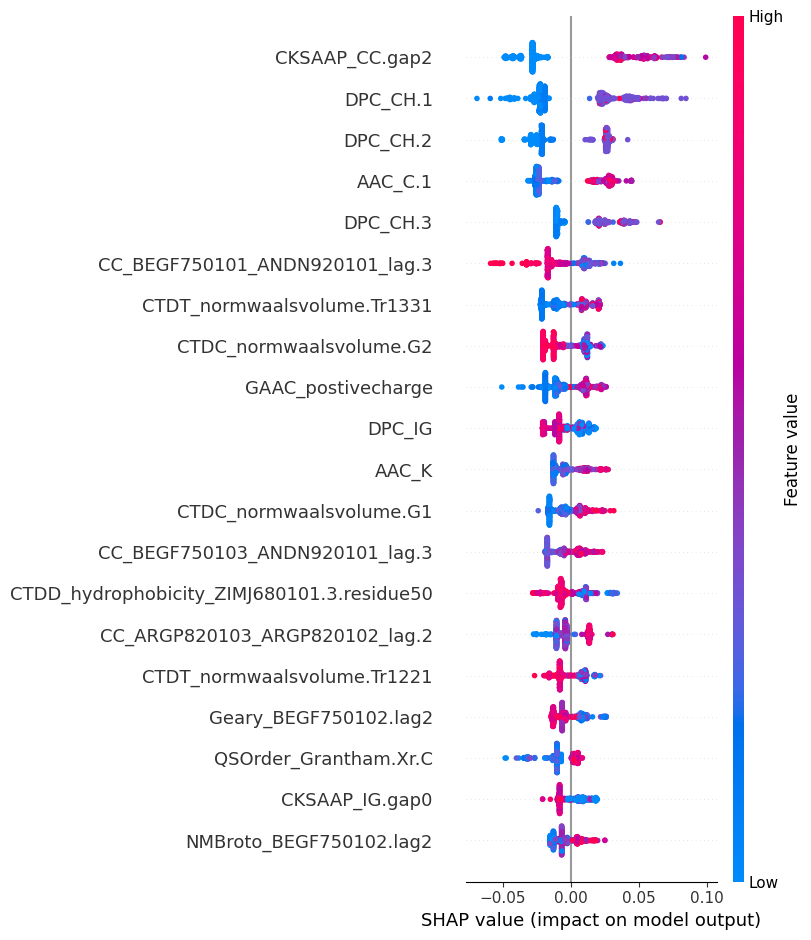

In [ ]:
shap.summary_plot(shap_values[1], testX)

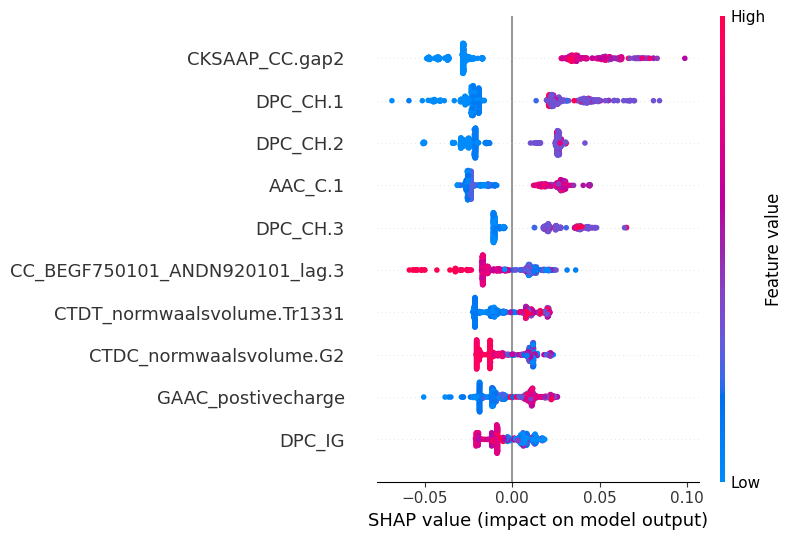

In [ ]:
shap.summary_plot(shap_values[1], testX, max_display=10)